# MESC analysis

In [1]:
library(data.table)
library(tidyverse)
library(wesanderson)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [2]:
all.gene <- read.table("out/all.gene.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med", header = T)
all.gene

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
h2med,0.01102589,0.004399838,0.03154292,0.01245856
h2nonmed,0.33852597,0.014372453,0.96845708,0.01245856
h2,0.34955186,0.014462320,1.00000000,0.00000000


In [3]:
all.iso <- read.table("out/all.iso.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med", header = T)

In [4]:
all.intron <- read.table("out/all.intron.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med", header = T)

In [7]:
df <- rbind(all.gene, all.iso, all.intron)
df$Category <- c(rep("Genes", 3), rep("Isoforms", 3), rep("Introns", 3))
df <- df %>% filter(Quantity == "h2med")
df$Category <- factor(df$Category, levels = c("Genes", "Isoforms", "Introns"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
df

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Category,ZSCORE.est_over_h2,PVAL.est_over_h2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
h2med,0.011025886,0.004399838,0.03154292,0.01245856,Genes,2.531826,0.0056735073
h2med,0.022719218,0.006794974,0.06454355,0.01918199,Isoforms,3.364800,0.0003829957
h2med,0.007429701,0.006103173,0.02132463,0.01735272,Introns,1.228892,0.1095560635


In [8]:
signif_gene <- data.frame("Category" = "Genes", "Estimate_over_h2" = 0.03154292 + 0.01245856 + 0.002)
signif_iso <- data.frame("Category" = "Isoforms", "Estimate_over_h2" = 0.06454355 + 0.01918199 + 0.002)

In [9]:
colors <- c("Genes" = "#648FFF", "Isoforms" = "#DC267F", "Introns" = "#FFB000")

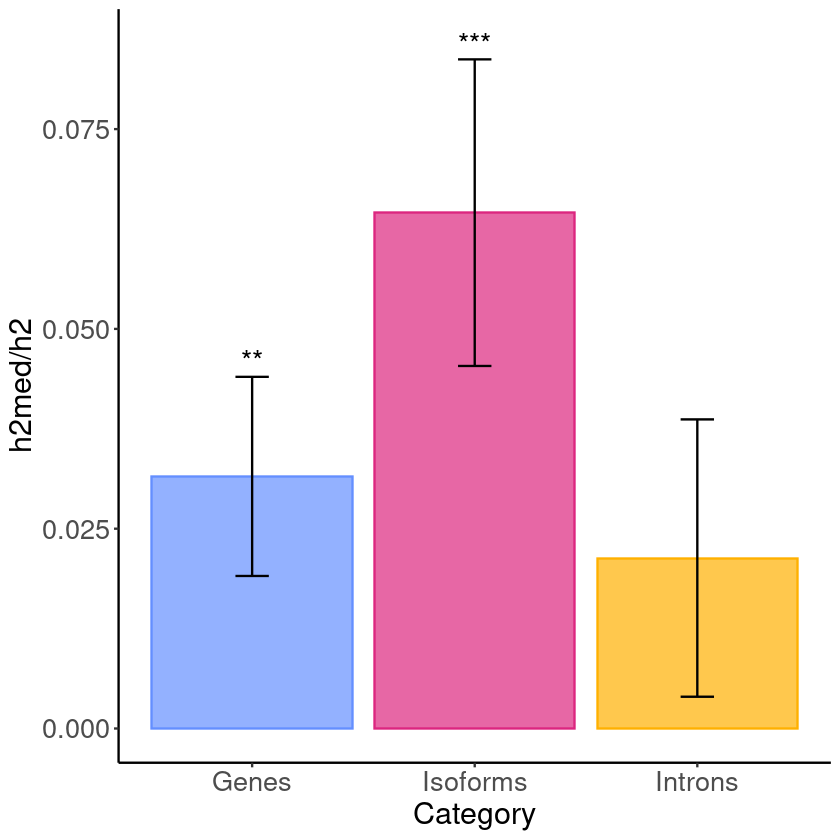

In [15]:
ggplot(df, aes(x = Category, y = Estimate_over_h2)) +
    geom_bar(stat = "identity", aes(color = Category, fill = Category), alpha = 0.7) +
    scale_color_manual(values = colors) +
    scale_fill_manual(values = colors) +
    geom_errorbar(aes(ymin = (Estimate_over_h2 - SE.Estimate_over_h2.), 
                      ymax = (Estimate_over_h2 + SE.Estimate_over_h2.)), width = .15) +
    theme_classic() +
    labs(x = "Category",
         y = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
    geom_text(data = signif_gene, label = "**", size = 6) +
    geom_text(data = signif_iso, label = "***", size = 6)

In [16]:
ggsave("figures/mesc.pdf", height = 6, width = 6)

**More traits**

In [67]:
setwd("../")

In [68]:
gene.results <- list.files(path = "out/", pattern = "^all.gene.*.all.h2med")
iso.results <- list.files(path = "out/", pattern = "^all.iso.*.all.h2med")
intron.results <- list.files(path = "out/", pattern = "^all.intron.*.all.h2med")

In [69]:
gene.results

[1] "all.gene.ADHD.Demontis.2019.all.h2med"                        
[2] "all.gene.ALZ.Jansen.2019.all.h2med"                           
[3] "all.gene.ASD.iPSYCHPGC.2018.all.h2med"                        
[4] "all.gene.EduYears.SSGAC.Lee2018.all.h2med"                    
[5] "all.gene.Insomnia.Jansen.2018.all.h2med"                      
[6] "all.gene.Intelligence.SavageNatGen.2018.all.h2med"            
[7] "all.gene.MDD.Howard.PGC.2019.all.h2med"                       
[8] "all.gene.pgc-bip2021-all.all.h2med"                           
[9] "all.gene.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med"

In [71]:
setwd("out")

In [72]:
for (i in 1:length(gene.results)) {
    file_name <- sub('all.gene.', '', gene.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(gene.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
gene.df <- gene.df %>% filter(Quantity == "h2med")
gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
gene.df$Group <- "Genes"

In [73]:
for (i in 1:length(iso.results)) {
    file_name <- sub('all.iso.', '', iso.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(iso.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

iso.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
iso.df <- iso.df %>% filter(Quantity == "h2med")
iso.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
iso.df$Group <- "Isoforms"

In [74]:
for (i in 1:length(intron.results)) {
    file_name <- sub('all.intron.', '', intron.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(intron.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

intron.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
intron.df <- intron.df %>% filter(Quantity == "h2med")
intron.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
intron.df$Group <- "Introns"

In [75]:
df <- rbind(gene.df, iso.df, intron.df)
df <- df %>% filter(Trait != "ALZ.Jansen.2019")
df$Group <- factor(df$Group, levels = c("Introns", "Isoforms", "Genes"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
# df

In [76]:
df$FDR <- p.adjust(df$PVAL.est_over_h2, method = 'fdr')

In [77]:
df$sig <- NA
for (i in 1:nrow(df)) {
    if(df[i,'FDR'] > 0.05) {
        df[i,'sig'] <- ''
    }
    if(df[i,'FDR'] < 0.05 & df[i,'FDR'] > 0.01) {
        df[i,'sig'] <- '*'
    }
    if(df[i,'FDR'] < 0.01 & df[i,'FDR'] > 0.001) {
        df[i,'sig'] <- '**'
    }
    if(df[i,'FDR'] < 0.001) {
        df[i,'sig'] <- '***'
    }
}

In [78]:
table(df$sig)


      *  ** *** 
 15   5   3   1 

In [21]:
# sig_05 <- df %>% filter(PVAL.est_over_h2 < 0.05, PVAL.est_over_h2 > 0.01)
# sig_01 <- df %>% filter(PVAL.est_over_h2 < 0.01, PVAL.est_over_h2 > 0.001)
# sig_001 <- df %>% filter(PVAL.est_over_h2 < 0.001)

# non_sig <- df %>% filter(FDR > 0.05) # need this to align geom_text position_dodge
# sig_05 <- df %>% filter(FDR < 0.05, FDR > 0.01)
# sig_01 <- df %>% filter(FDR < 0.01, FDR > 0.001)
# sig_001 <- df %>% filter(FDR < 0.001)

In [79]:
df[df$Trait == "ADHD.Demontis.2019", 'Trait'] <- 'ADHD'
# df[df$Trait == "ALZ.Jansen.2019", 'Trait'] <- 'ALZ'
df[df$Trait == "ASD.iPSYCHPGC.2018", 'Trait'] <- 'ASD'
df[df$Trait == "EduYears.SSGAC.Lee2018", 'Trait'] <- 'EduYears'
df[df$Trait == "Insomnia.Jansen.2018", 'Trait'] <- 'Insomnia'
df[df$Trait == "Intelligence.SavageNatGen.2018", 'Trait'] <- 'Intelligence'
df[df$Trait == "MDD.Howard.PGC.2019", 'Trait'] <- 'MDD'
df[df$Trait == "pgc-bip2021-all", 'Trait'] <- 'BIP'
df[df$Trait == "PGC3_SCZ_wave3.european.autosome.public.v3", 'Trait'] <- 'SCZ'

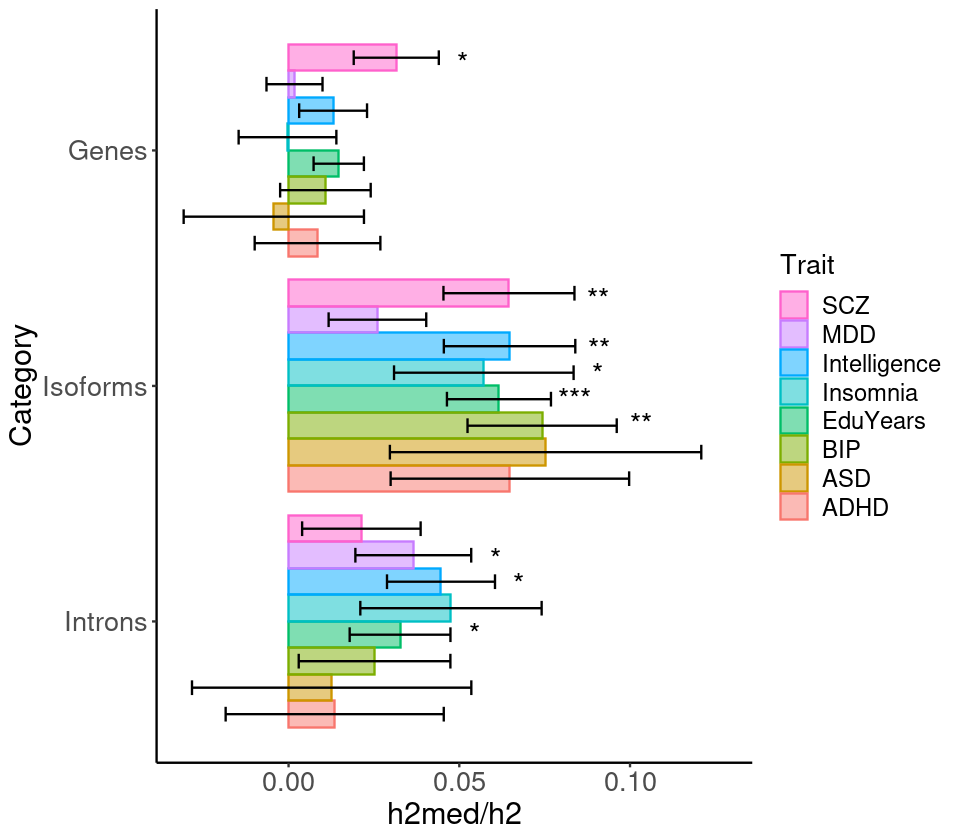

In [80]:
options(repr.plot.height = 7, repr.plot.width = 8)


ggplot(df, aes(y = Group, x = Estimate_over_h2, color = Trait, fill = Trait,
               xmin = (Estimate_over_h2 - SE.Estimate_over_h2.),
               xmax = (Estimate_over_h2 + SE.Estimate_over_h2.))) +
    geom_bar(stat = "identity", alpha = 0.5, position = position_dodge(width = .9)) +
    geom_errorbar(width = 0.5, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
    labs(y = "Category",
         x = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    geom_text(aes(x = Estimate_over_h2 + SE.Estimate_over_h2. + 0.007, label = sig), 
              color = "black", size = 6, position = position_dodge(width = .85)) +
    guides(color = guide_legend(reverse = TRUE),
           fill = guide_legend(reverse = TRUE))

In [81]:
ggsave("../figures/mesc_bar.pdf", height = 7, width = 8)

**Tile plot: tri gene/intron; sex gene; cell types gene**

In [2]:
setwd("~/project-gandalm/isoform_twas/MESC/")

In [4]:
tri1.gene.results <- list.files(path = "out/", pattern = "^tri1_25HCP.all.gene.*.all.h2med")
tri2.gene.results <- list.files(path = "out/", pattern = "^tri2_15HCP.all.gene.*.all.h2med")
tri1.intron.results <- list.files(path = "out/", pattern = "^tri1_15HCP.all.intron.*.all.h2med")
tri2.intron.results <- list.files(path = "out/", pattern = "^tri2_10HCP.all.intron.*.all.h2med")
tri1.iso.results <- list.files(path = "out/", pattern = "^tri1_35HCP.all.iso.*.all.h2med")
tri2.iso.results <- list.files(path = "out/", pattern = "^tri2_20HCP.all.iso.*.all.h2med")

In [16]:
# male.gene.results <- list.files(path = "out/", pattern = "^m_50HCP.all.gene.*.all.h2med")
# female.gene.results <- list.files(path = "out/", pattern = "^f_50HCP.all.gene.*.all.h2med")

In [5]:
setwd("out")

In [6]:
for (i in 1:length(tri1.gene.results)) {
    file_name <- sub('tri1_25HCP.all.gene.', '', tri1.gene.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri1.gene.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri1.gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri1.gene.df <- tri1.gene.df %>% filter(Quantity == "h2med")
tri1.gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri1.gene.df$Group <- "Tri1 genes"

In [7]:
for (i in 1:length(tri2.gene.results)) {
    file_name <- sub('tri2_15HCP.all.gene.', '', tri2.gene.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri2.gene.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri2.gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri2.gene.df <- tri2.gene.df %>% filter(Quantity == "h2med")
tri2.gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri2.gene.df$Group <- "Tri2 genes"

In [20]:
# for (i in 1:length(male.gene.results)) {
#     file_name <- sub('m_50HCP.all.gene.', '', male.gene.results[i])
#     file_name <- sub('.all.h2med', '', file_name)
#     file_df <- read.table(male.gene.results[i], header = T, stringsAsFactors = F)
#     assign(x = file_name, value = file_df, envir = .GlobalEnv)
# }

# male.gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
#                 EduYears.SSGAC.Lee2018, 
#                 Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
#                 PGC3_SCZ_wave3.european.autosome.public.v3)
# male.gene.df <- male.gene.df %>% filter(Quantity == "h2med")
# male.gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
#                   "EduYears.SSGAC.Lee2018", 
#                   "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
#                   "PGC3_SCZ_wave3.european.autosome.public.v3")
# male.gene.df$Group <- "Male genes"

In [21]:
# for (i in 1:length(female.gene.results)) {
#     file_name <- sub('f_50HCP.all.gene.', '', female.gene.results[i])
#     file_name <- sub('.all.h2med', '', file_name)
#     file_df <- read.table(female.gene.results[i], header = T, stringsAsFactors = F)
#     assign(x = file_name, value = file_df, envir = .GlobalEnv)
# }

# female.gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
#                 EduYears.SSGAC.Lee2018, 
#                 Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
#                 PGC3_SCZ_wave3.european.autosome.public.v3)
# female.gene.df <- female.gene.df %>% filter(Quantity == "h2med")
# female.gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
#                   "EduYears.SSGAC.Lee2018", 
#                   "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
#                   "PGC3_SCZ_wave3.european.autosome.public.v3")
# female.gene.df$Group <- "Female genes"

In [17]:
for (i in 1:length(tri1.intron.results)) {
    file_name <- sub('tri1_15HCP.all.intron.', '', tri1.intron.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri1.intron.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri1.intron.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri1.intron.df <- tri1.intron.df %>% filter(Quantity == "h2med")
tri1.intron.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri1.intron.df$Group <- "Tri1 introns"

for (i in 1:length(tri2.intron.results)) {
    file_name <- sub('tri2_10HCP.all.intron.', '', tri2.intron.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri2.intron.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri2.intron.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri2.intron.df <- tri2.intron.df %>% filter(Quantity == "h2med")
tri2.intron.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri2.intron.df$Group <- "Tri2 introns"

In [8]:
for (i in 1:length(tri1.iso.results)) {
    file_name <- sub('tri1_35HCP.all.iso.', '', tri1.iso.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri1.iso.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri1.iso.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri1.iso.df <- tri1.iso.df %>% filter(Quantity == "h2med")
tri1.iso.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri1.iso.df$Group <- "Tri1 isoforms"

for (i in 1:length(tri2.iso.results)) {
    file_name <- sub('tri2_20HCP.all.iso.', '', tri2.iso.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri2.iso.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri2.iso.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri2.iso.df <- tri2.iso.df %>% filter(Quantity == "h2med")
tri2.iso.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri2.iso.df$Group <- "Tri2 isoforms"

In [9]:
df <- rbind(tri1.gene.df, tri2.gene.df, tri1.iso.df, tri2.iso.df)
df$Group <- factor(df$Group, levels = c("Tri1 genes", "Tri2 genes", "Tri1 isoforms", "Tri2 isoforms"))

In [10]:
df1 <- df %>% filter(Group == "Tri1 genes", Trait != "ALZ.Jansen.2019")
df2 <- df %>% filter(Group == "Tri2 genes", Trait != "ALZ.Jansen.2019")
df1
df2

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Trait,Group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
h2med,-0.0001206215,0.0052904978,-0.0004680326,0.020564650,ADHD.Demontis.2019,Tri1 genes
h2med,0.0067813660,0.0058283567,0.0388248761,0.032689969,ASD.iPSYCHPGC.2018,Tri1 genes
h2med,0.0028990655,0.0010076794,0.0256343708,0.008740141,EduYears.SSGAC.Lee2018,Tri1 genes
h2med,0.0012293212,0.0007596400,0.0290847268,0.017800899,Insomnia.Jansen.2018,Tri1 genes
h2med,0.0051625665,0.0019178369,0.0275671775,0.010167088,Intelligence.SavageNatGen.2018,Tri1 genes
h2med,0.0008801396,0.0005919555,0.0147662662,0.009914497,MDD.Howard.PGC.2019,Tri1 genes
h2med,0.0014132111,0.0010918824,0.0216574231,0.016625124,pgc-bip2021-all,Tri1 genes
h2med,0.0058586368,0.0046232954,0.0167938951,0.013215689,PGC3_SCZ_wave3.european.autosome.public.v3,Tri1 genes


Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Trait,Group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
h2med,0.0054615678,0.0048814643,0.021003137,0.018677613,ADHD.Demontis.2019,Tri2 genes
h2med,0.0063859657,0.0044590338,0.036496221,0.024953243,ASD.iPSYCHPGC.2018,Tri2 genes
h2med,0.0013988107,0.0007186329,0.012375696,0.006305552,EduYears.SSGAC.Lee2018,Tri2 genes
h2med,0.0014457498,0.0005887952,0.034001763,0.013843979,Insomnia.Jansen.2018,Tri2 genes
h2med,0.0041880092,0.0016355111,0.022336069,0.008648398,Intelligence.SavageNatGen.2018,Tri2 genes
h2med,0.0002631986,0.0004434654,0.004421875,0.007452219,MDD.Howard.PGC.2019,Tri2 genes
h2med,0.0008886461,0.0008445029,0.013635714,0.012903143,pgc-bip2021-all,Tri2 genes
h2med,0.0073575250,0.0037648268,0.021023213,0.010660133,PGC3_SCZ_wave3.european.autosome.public.v3,Tri2 genes


In [11]:
t.test(df1$Estimate_over_h2, df2$Estimate_over_h2, paired = TRUE)


	Paired t-test

data:  df1$Estimate_over_h2 and df2$Estimate_over_h2
t = 0.27109, df = 7, p-value = 0.7941
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.008269897  0.010411651
sample estimates:
mean of the differences 
            0.001070877 


In [12]:
df1.iso <- df %>% filter(Group == "Tri1 isoforms", Trait != "ALZ.Jansen.2019")
df2.iso <- df %>% filter(Group == "Tri2 isoforms", Trait != "ALZ.Jansen.2019")
t.test(df1.iso$Estimate_over_h2, df2.iso$Estimate_over_h2, paired = TRUE)


	Paired t-test

data:  df1.iso$Estimate_over_h2 and df2.iso$Estimate_over_h2
t = -2.3935, df = 7, p-value = 0.04792
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0312895040 -0.0001896523
sample estimates:
mean of the differences 
            -0.01573958 


In [43]:
df1.iso
df2.iso

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Trait,Group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
h2med,0.007002561,0.009238862,0.02700271,0.03547743,ADHD.Demontis.2019,Tri1 isoforms
h2med,0.004169747,0.008743323,0.02413262,0.05023054,ASD.iPSYCHPGC.2018,Tri1 isoforms
h2med,0.005078705,0.001733452,0.04464688,0.01487590,EduYears.SSGAC.Lee2018,Tri1 isoforms
h2med,0.001735690,0.001261314,0.04081627,0.02936725,Insomnia.Jansen.2018,Tri1 isoforms
h2med,0.015201012,0.004253059,0.07989655,0.02179960,Intelligence.SavageNatGen.2018,Tri1 isoforms
h2med,0.001659541,0.000950919,0.02761510,0.01578506,MDD.Howard.PGC.2019,Tri1 isoforms
h2med,0.006244892,0.001749663,0.09351755,0.02572168,pgc-bip2021-all,Tri1 isoforms
h2med,0.025723940,0.006929291,0.07287651,0.01944059,PGC3_SCZ_wave3.european.autosome.public.v3,Tri1 isoforms


Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Trait,Group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
h2med,0.014607596,0.009673108,0.05558836,0.03643029,ADHD.Demontis.2019,Tri2 isoforms
h2med,0.012841455,0.007853070,0.07266556,0.04535429,ASD.iPSYCHPGC.2018,Tri2 isoforms
h2med,0.007409876,0.001873139,0.06447678,0.01583437,EduYears.SSGAC.Lee2018,Tri2 isoforms
h2med,0.002716515,0.001264248,0.06343398,0.02908717,Insomnia.Jansen.2018,Tri2 isoforms
h2med,0.015289259,0.004225844,0.08013796,0.02172780,Intelligence.SavageNatGen.2018,Tri2 isoforms
h2med,0.001766880,0.001079177,0.02947807,0.01791194,MDD.Howard.PGC.2019,Tri2 isoforms
h2med,0.007299497,0.001666518,0.10816377,0.02407364,pgc-bip2021-all,Tri2 isoforms
h2med,0.022159134,0.006570508,0.06247635,0.01818201,PGC3_SCZ_wave3.european.autosome.public.v3,Tri2 isoforms


In [15]:
install.packages("metap")

Installing package into ‘/u/home/c/cindywen/R/x86_64-pc-linux-gnu-library-RH7/4.1.0’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TFisher’, ‘mutoss’, ‘qqconf’




In [40]:
library(metap)
compare_h2 <- function(df1, df2){
    # df1 - df2
    zscores <- (df1$Estimate_over_h2 - df2$Estimate_over_h2) / sqrt(
        df1$SE.Estimate_over_h2.^2 + df2$SE.Estimate_over_h2.^2
    )
    cat(zscores)
    pvalues <- 1 - pnorm(zscores)
    print("")
    cat(pvalues)
    
    return(sumz(pvalues))
}

In [44]:
compare_h2(df2.iso, df1.iso)
compare_h2(df1.iso, df2.iso)

0.5621465 0.7171305 0.9127258 0.5471938 0.007843355 0.07803091 0.4157328 -0.390718[1] ""
0.2870081 0.2366468 0.1806934 0.2921228 0.496871 0.4689017 0.3388028 0.6519972

sumz =  1.007657 p =  0.1568095 

-0.5621465 -0.7171305 -0.9127258 -0.5471938 -0.007843355 -0.07803091 -0.4157328 0.390718[1] ""
0.7129919 0.7633532 0.8193066 0.7078772 0.503129 0.5310983 0.6611972 0.3480028

sumz =  -1.007657 p =  0.8431905 

In [45]:
compare_h2(df2, df1)
compare_h2(df1, df2)

0.7728854 -0.05662329 -1.230242 0.218045 -0.3919072 -0.8340276 -0.381172 0.2490883[1] ""
0.2197951 0.5225774 0.8906967 0.413697 0.6524366 0.7978673 0.6484622 0.4016462

sumz =  -0.5847607 p =  0.7206457 

-0.7728854 0.05662329 1.230242 -0.218045 0.3919072 0.8340276 0.381172 -0.2490883[1] ""
0.7802049 0.4774226 0.1093033 0.586303 0.3475634 0.2021327 0.3515378 0.5983538

sumz =  0.5847607 p =  0.2793543 

In [19]:
df <- rbind(tri1.gene.df, tri2.gene.df, tri1.intron.df, tri2.intron.df, tri1.iso.df, tri2.iso.df)
df$Group <- factor(df$Group, levels = c("Tri1 genes", "Tri2 genes", "Tri1 isoforms", "Tri2 isoforms",
                                        "Tri1 introns", "Tri2 introns"))
# head(df)

In [20]:
df <- df %>% filter(Trait != "ALZ.Jansen.2019")

In [21]:
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
# df
df$FDR <- p.adjust(df$PVAL.est_over_h2, method = 'fdr')

In [27]:
df$sig_FDR <- NA
for (i in 1:nrow(df)) {
    if(df[i,'FDR'] > 0.05) {
        df[i,'sig_FDR'] <- ''
    }
    if(df[i,'FDR'] < 0.05 & df[i,'FDR'] > 0.01) {
        df[i,'sig_FDR'] <- '*'
    }
    if(df[i,'FDR'] < 0.01 & df[i,'FDR'] > 0.001) {
        df[i,'sig_FDR'] <- '**'
    }
    if(df[i,'FDR'] < 0.001) {
        df[i,'sig_FDR'] <- '***'
    }
}

In [22]:
df[df$Trait == "ADHD.Demontis.2019", 'Trait'] <- 'ADHD'
# df[df$Trait == "ALZ.Jansen.2019", 'Trait'] <- 'ALZ'
df[df$Trait == "ASD.iPSYCHPGC.2018", 'Trait'] <- 'ASD'
df[df$Trait == "EduYears.SSGAC.Lee2018", 'Trait'] <- 'EduYears'
df[df$Trait == "Insomnia.Jansen.2018", 'Trait'] <- 'Insomnia'
df[df$Trait == "Intelligence.SavageNatGen.2018", 'Trait'] <- 'Intelligence'
df[df$Trait == "MDD.Howard.PGC.2019", 'Trait'] <- 'MDD'
df[df$Trait == "pgc-bip2021-all", 'Trait'] <- 'BIP'
df[df$Trait == "PGC3_SCZ_wave3.european.autosome.public.v3", 'Trait'] <- 'SCZ'

In [23]:
write.table(df, "/u/scratch/c/cindywen/mesc.tsv", col.names = T, row.names = F, quote = F, sep = "\t")

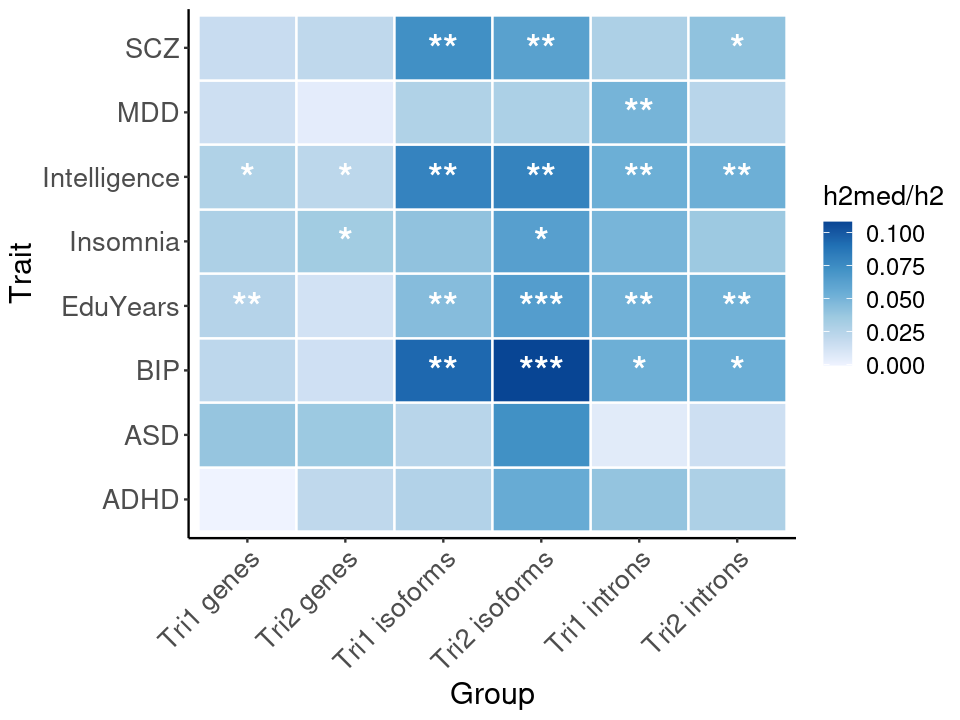

In [29]:
# pal <- wes_palette("Zissou1", 100, type = "continuous")

options(repr.plot.height = 6, repr.plot.width = 8)

ggplot(df, aes(x = Group, y = Trait, fill = Estimate_over_h2)) +
    geom_tile(color = "white", size = 0.5) +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          legend.position = "right") +
          scale_fill_distiller(name = "h2med/h2", palette = "Blues", direction = 1) +
    geom_text(aes(label = sig_FDR), color = "white", size = 8, fontface = "bold")

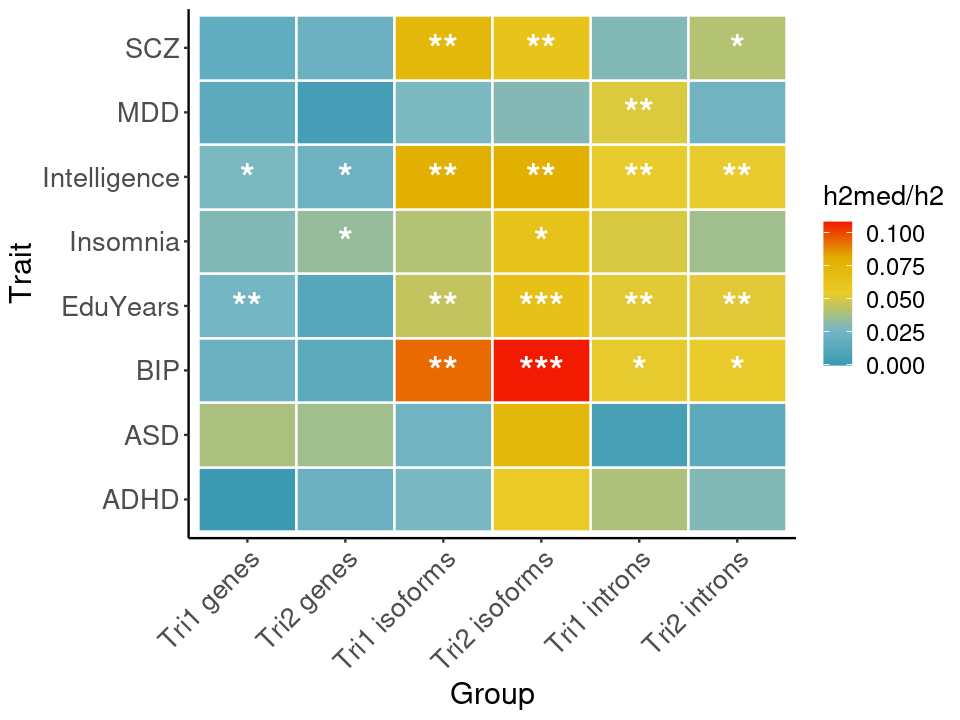

In [30]:
pal <- wes_palette("Zissou1", 100, type = "continuous")

ggplot(df, aes(x = Group, y = Trait, fill = Estimate_over_h2)) +
    geom_tile(colour = "white", size = 0.5) +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          legend.position = "right") +
          scale_fill_gradientn(colours = pal, name = "h2med/h2") +
    geom_text(aes(label = sig_FDR), color = "white", size = 8, fontface = "bold")

In [31]:
ggsave("../figures/mesc_fdr.pdf", height = 6, width = 8)

**Stratify to LDSC baseline annotations**

In [25]:
gene.results <- list.files(path = "out/", pattern = "^all.gene.*.all.h2med")
gene.baseline.results <- list.files(path = "out/", pattern = "^LDSCbaseline.all.gene.*.all.h2med")

In [28]:
for (i in 1:length(gene.results)) {
    file_name <- sub('all.gene.', '', gene.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(gene.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
gene.df <- gene.df %>% filter(Quantity == "h2med")
gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
gene.df$Group <- "Genes"

for (i in 1:length(gene.baseline.results)) {
    file_name <- sub('LDSCbaseline.all.gene.', '', gene.baseline.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(gene.baseline.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

gene.baseline.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
gene.baseline.df <- gene.baseline.df %>% filter(Quantity == "h2med")
gene.baseline.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
gene.baseline.df$Group <- "Genes, stratified to baselines"

In [29]:
df <- rbind(gene.df, gene.baseline.df)
df <- df %>% filter(Trait != "ALZ.Jansen.2019")
df$Group <- factor(df$Group, levels = c("Genes, stratified to baselines", "Genes"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
# df

In [30]:
df$FDR <- p.adjust(df$PVAL.est_over_h2, method = 'fdr')

In [31]:
df$sig <- NA
for (i in 1:nrow(df)) {
    if(df[i,'FDR'] > 0.05) {
        df[i,'sig'] <- ''
    }
    if(df[i,'FDR'] < 0.05 & df[i,'FDR'] > 0.01) {
        df[i,'sig'] <- '*'
    }
    if(df[i,'FDR'] < 0.01 & df[i,'FDR'] > 0.001) {
        df[i,'sig'] <- '**'
    }
    if(df[i,'FDR'] < 0.001) {
        df[i,'sig'] <- '***'
    }
}

In [32]:
df[df$Trait == "ADHD.Demontis.2019", 'Trait'] <- 'ADHD'
# df[df$Trait == "ALZ.Jansen.2019", 'Trait'] <- 'ALZ'
df[df$Trait == "ASD.iPSYCHPGC.2018", 'Trait'] <- 'ASD'
df[df$Trait == "EduYears.SSGAC.Lee2018", 'Trait'] <- 'EduYears'
df[df$Trait == "Insomnia.Jansen.2018", 'Trait'] <- 'Insomnia'
df[df$Trait == "Intelligence.SavageNatGen.2018", 'Trait'] <- 'Intelligence'
df[df$Trait == "MDD.Howard.PGC.2019", 'Trait'] <- 'MDD'
df[df$Trait == "pgc-bip2021-all", 'Trait'] <- 'BIP'
df[df$Trait == "PGC3_SCZ_wave3.european.autosome.public.v3", 'Trait'] <- 'SCZ'

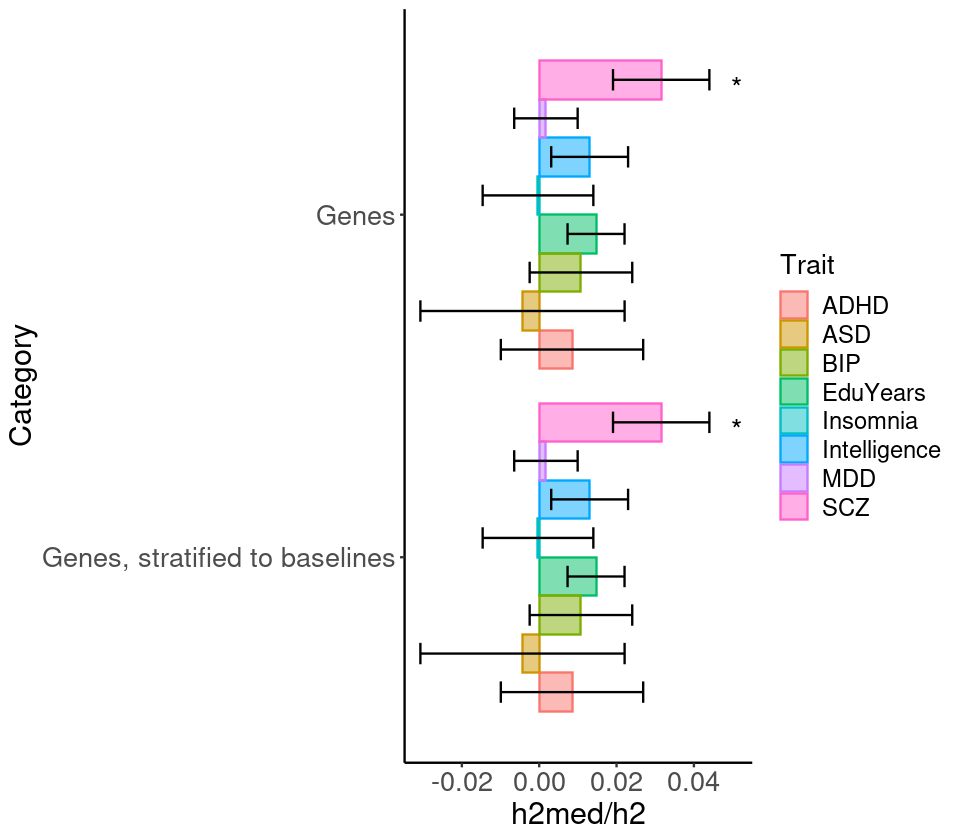

In [33]:
options(repr.plot.height = 7, repr.plot.width = 8)


ggplot(df, aes(y = Group, x = Estimate_over_h2, color = Trait, fill = Trait,
               xmin = (Estimate_over_h2 - SE.Estimate_over_h2.),
               xmax = (Estimate_over_h2 + SE.Estimate_over_h2.))) +
    geom_bar(stat = "identity", alpha = 0.5, position = position_dodge(width = .9)) +
    geom_errorbar(width = 0.5, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
    labs(y = "Category",
         x = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    geom_text(aes(x = Estimate_over_h2 + SE.Estimate_over_h2. + 0.007, label = sig), 
              color = "black", size = 6, position = position_dodge(width = .85))

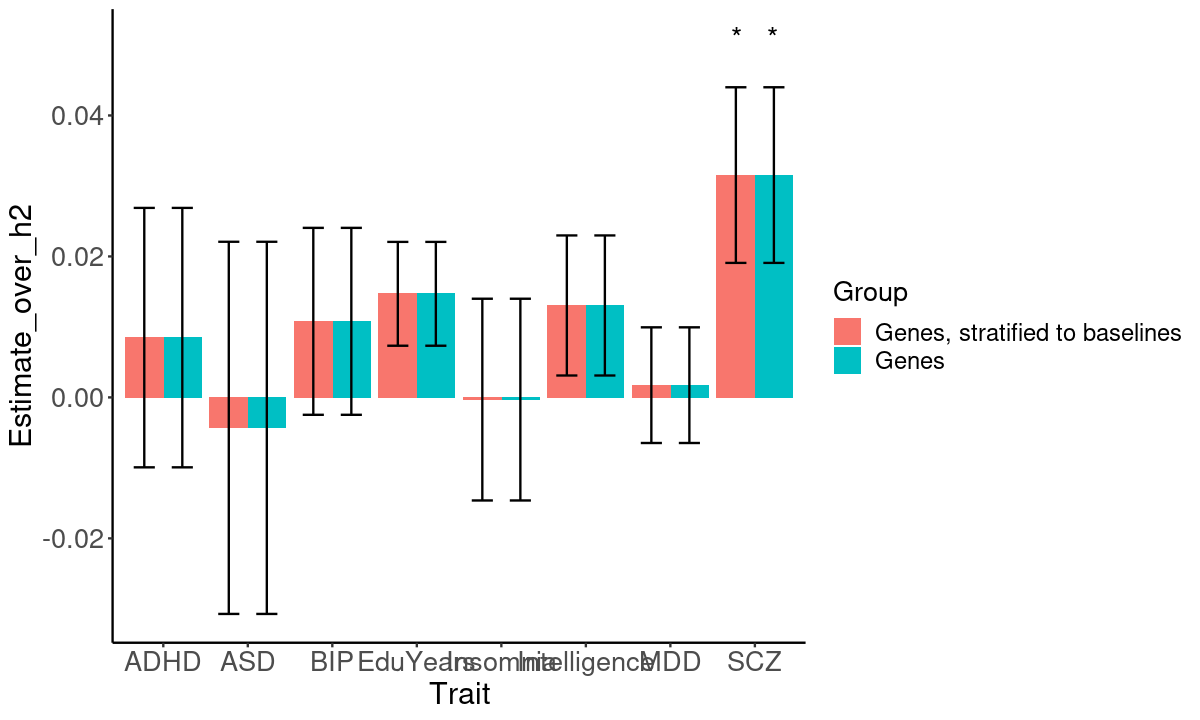

In [34]:
options(repr.plot.height = 6, repr.plot.width = 10)

ggplot(df, aes(x = Trait, y = Estimate_over_h2, fill = Group, 
               ymin = (Estimate_over_h2 - SE.Estimate_over_h2.),
               ymax = (Estimate_over_h2 + SE.Estimate_over_h2.))) +
    geom_bar(stat = "identity", position = "dodge") +
    geom_errorbar(width = 0.5, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
    labs(y = "Estimate_over_h2",
         x = "Trait") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    geom_text(aes(y = Estimate_over_h2 + SE.Estimate_over_h2. + 0.007, label = sig), 
              color = "black", size = 6, position = position_dodge(width = .85))

**4/27/2023, revision, eQTL, isoQTL, remove pLI>0.9 genes**

In [46]:
setwd("/u/project/gandalm/cindywen/isoform_twas/MESC/out/")

In [47]:
e.res <- list.files(path = ".", pattern = "^notHighpLI.gene.*.all.h2med")
iso.res <- list.files(path = ".", pattern = "^notHighpLI.iso.*.all.h2med")

In [48]:
for (i in 1:length(e.res)) {
    file_name <- sub('notHighpLI.gene.', '', e.res[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(e.res[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

e.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
e.df <- e.df %>% filter(Quantity == "h2med")
e.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
e.df$Group <- "eQTL"

In [49]:
for (i in 1:length(iso.res)) {
    file_name <- sub('notHighpLI.iso.', '', iso.res[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(iso.res[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

iso.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
iso.df <- iso.df %>% filter(Quantity == "h2med")
iso.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
iso.df$Group <- "isoQTL"

In [50]:
df <- rbind(e.df, iso.df)
df <- df %>% filter(Trait != "ALZ.Jansen.2019")
df[df$Trait == "ADHD.Demontis.2019", 'Trait'] <- 'ADHD'
# df[df$Trait == "ALZ.Jansen.2019", 'Trait'] <- 'ALZ'
df[df$Trait == "ASD.iPSYCHPGC.2018", 'Trait'] <- 'ASD'
df[df$Trait == "EduYears.SSGAC.Lee2018", 'Trait'] <- 'EduYears'
df[df$Trait == "Insomnia.Jansen.2018", 'Trait'] <- 'Insomnia'
df[df$Trait == "Intelligence.SavageNatGen.2018", 'Trait'] <- 'Intelligence'
df[df$Trait == "MDD.Howard.PGC.2019", 'Trait'] <- 'MDD'
df[df$Trait == "pgc-bip2021-all", 'Trait'] <- 'BIP'
df[df$Trait == "PGC3_SCZ_wave3.european.autosome.public.v3", 'Trait'] <- 'SCZ'

In [51]:
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)

df$FDR <- p.adjust(df$PVAL.est_over_h2, method = 'fdr')

df$sig <- NA
for (i in 1:nrow(df)) {
    if(df[i,'FDR'] > 0.05) {
        df[i,'sig'] <- ''
    }
    if(df[i,'FDR'] < 0.05 & df[i,'FDR'] > 0.01) {
        df[i,'sig'] <- '*'
    }
    if(df[i,'FDR'] < 0.01 & df[i,'FDR'] > 0.001) {
        df[i,'sig'] <- '**'
    }
    if(df[i,'FDR'] < 0.001) {
        df[i,'sig'] <- '***'
    }
}

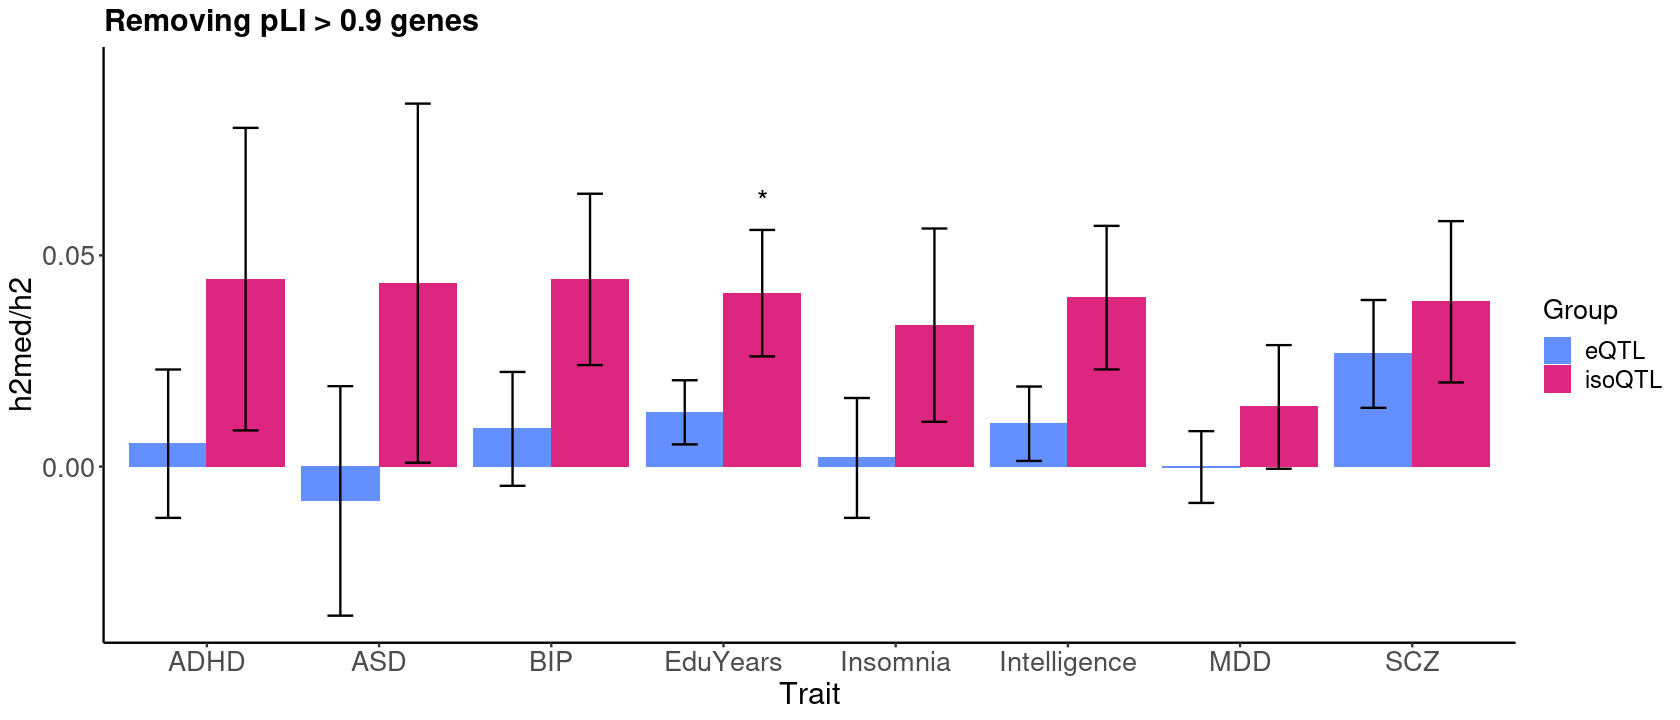

In [10]:
options(repr.plot.height = 6, repr.plot.width = 14)

ggplot(df, aes(x = Trait, y = Estimate_over_h2, fill = Group,
               ymin = (Estimate_over_h2 - SE.Estimate_over_h2.),
               ymax = (Estimate_over_h2 + SE.Estimate_over_h2.))) +
    geom_bar(position = position_dodge(width = .9), stat = "identity") +
    geom_errorbar(width = 0.3, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
    labs(x = "Trait",
         y = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          plot.title = element_text(size = 18, face = "bold")) +
#     scale_alpha_manual(values = c(0.3, 1)) +
    scale_fill_manual(values = c("eQTL" = "#648FFF", "isoQTL" = "#DC267F")) +
    ggtitle("Removing pLI > 0.9 genes") +
    geom_text(aes(y = Estimate_over_h2 + SE.Estimate_over_h2. + 0.007, label = sig), 
              color = "black", size = 6, position = position_dodge(width = .9))

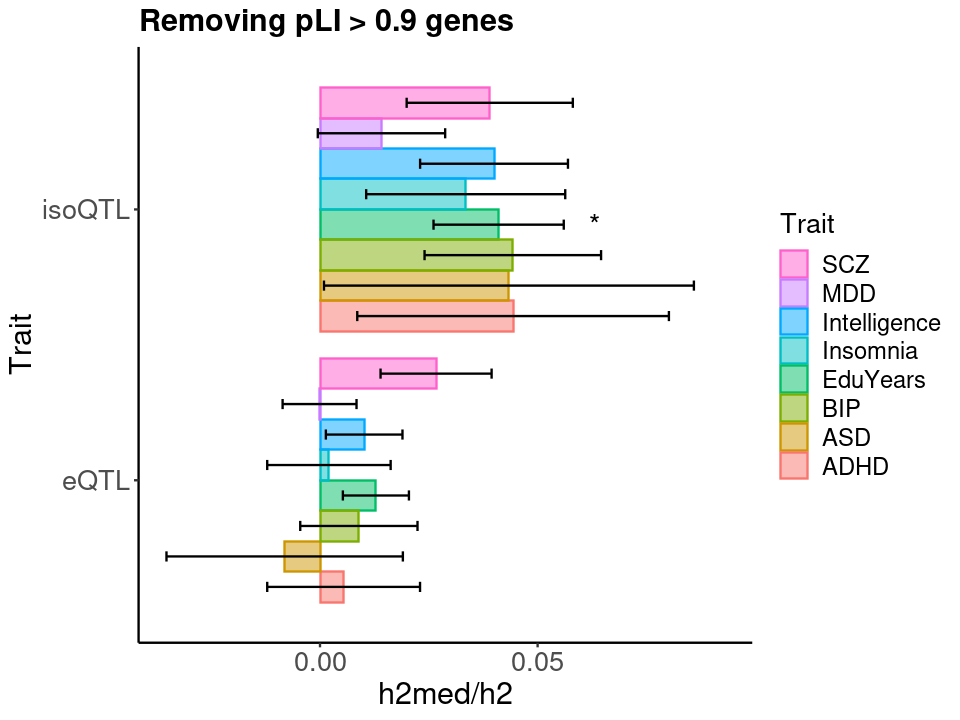

In [54]:
options(repr.plot.height = 6, repr.plot.width = 8)

ggplot(df, aes(y = Group, x = Estimate_over_h2, color = Trait, fill = Trait,
               xmin = (Estimate_over_h2 - SE.Estimate_over_h2.),
               xmax = (Estimate_over_h2 + SE.Estimate_over_h2.))) +
    geom_bar(stat = "identity", alpha = 0.5, position = position_dodge(width = .9)) +
    geom_errorbar(width = 0.3, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
    labs(y = "Trait",
         x = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          plot.title = element_text(size = 18, face = "bold")) +
#     scale_fill_manual(values = c("eQTL" = "#648FFF", "isoQTL" = "#DC267F")) +
    ggtitle("Removing pLI > 0.9 genes") +
    geom_text(aes(x = Estimate_over_h2 + SE.Estimate_over_h2. + 0.007, label = sig), 
              color = "black", size = 6, position = position_dodge(width = .9)) +
    guides(color = guide_legend(reverse = TRUE),
           fill = guide_legend(reverse = TRUE))


In [55]:
ggsave("../figures/e_iso_pLI.pdf", height = 6, width = 8)

**tri e/isoQTL, protein-coding genes and isoforms (all tx of protein-coding genes)**

In [56]:
tri1.e.res <- list.files(path = ".", pattern = "^tri1_25HCP.proteincoding.gene.*.all.h2med")
tri2.e.res <- list.files(path = ".", pattern = "^tri2_15HCP.proteincoding.gene.*.all.h2med")

tri1.iso.res <- list.files(path = ".", pattern = "^tri1_35HCP.proteincoding.iso.*.all.h2med")
tri2.iso.res <- list.files(path = ".", pattern = "^tri2_20HCP.proteincoding.iso.*.all.h2med")

In [57]:
for (i in 1:length(tri1.e.res)) {
    file_name <- sub('tri1_25HCP.proteincoding.gene.', '', tri1.e.res[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri1.e.res[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri1.e.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri1.e.df <- tri1.e.df %>% filter(Quantity == "h2med")
tri1.e.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri1.e.df$Group <- "Tri1 eQTL"

In [58]:
for (i in 1:length(tri2.e.res)) {
    file_name <- sub('tri2_15HCP.proteincoding.gene.', '', tri2.e.res[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri2.e.res[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri2.e.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri2.e.df <- tri2.e.df %>% filter(Quantity == "h2med")
tri2.e.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri2.e.df$Group <- "Tri2 eQTL"

In [59]:
for (i in 1:length(tri1.iso.res)) {
    file_name <- sub('tri1_35HCP.proteincoding.iso.', '', tri1.iso.res[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri1.iso.res[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri1.iso.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri1.iso.df <- tri1.iso.df %>% filter(Quantity == "h2med")
tri1.iso.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri1.iso.df$Group <- "Tri1 isoQTL"

In [60]:
for (i in 1:length(tri2.iso.res)) {
    file_name <- sub('tri2_20HCP.proteincoding.iso.', '', tri2.iso.res[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri2.iso.res[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri2.iso.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri2.iso.df <- tri2.iso.df %>% filter(Quantity == "h2med")
tri2.iso.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri2.iso.df$Group <- "Tri2 isoQTL"

In [61]:
df <- rbind(tri1.e.df, tri2.e.df)
df <- df %>% filter(Trait != "ALZ.Jansen.2019")
df[df$Trait == "ADHD.Demontis.2019", 'Trait'] <- 'ADHD'
# df[df$Trait == "ALZ.Jansen.2019", 'Trait'] <- 'ALZ'
df[df$Trait == "ASD.iPSYCHPGC.2018", 'Trait'] <- 'ASD'
df[df$Trait == "EduYears.SSGAC.Lee2018", 'Trait'] <- 'EduYears'
df[df$Trait == "Insomnia.Jansen.2018", 'Trait'] <- 'Insomnia'
df[df$Trait == "Intelligence.SavageNatGen.2018", 'Trait'] <- 'Intelligence'
df[df$Trait == "MDD.Howard.PGC.2019", 'Trait'] <- 'MDD'
df[df$Trait == "pgc-bip2021-all", 'Trait'] <- 'BIP'
df[df$Trait == "PGC3_SCZ_wave3.european.autosome.public.v3", 'Trait'] <- 'SCZ'

df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)

df$FDR <- p.adjust(df$PVAL.est_over_h2, method = 'fdr')

df$sig <- NA
for (i in 1:nrow(df)) {
    if(df[i,'FDR'] > 0.05) {
        df[i,'sig'] <- ''
    }
    if(df[i,'FDR'] < 0.05 & df[i,'FDR'] > 0.01) {
        df[i,'sig'] <- '*'
    }
    if(df[i,'FDR'] < 0.01 & df[i,'FDR'] > 0.001) {
        df[i,'sig'] <- '**'
    }
    if(df[i,'FDR'] < 0.001) {
        df[i,'sig'] <- '***'
    }
}



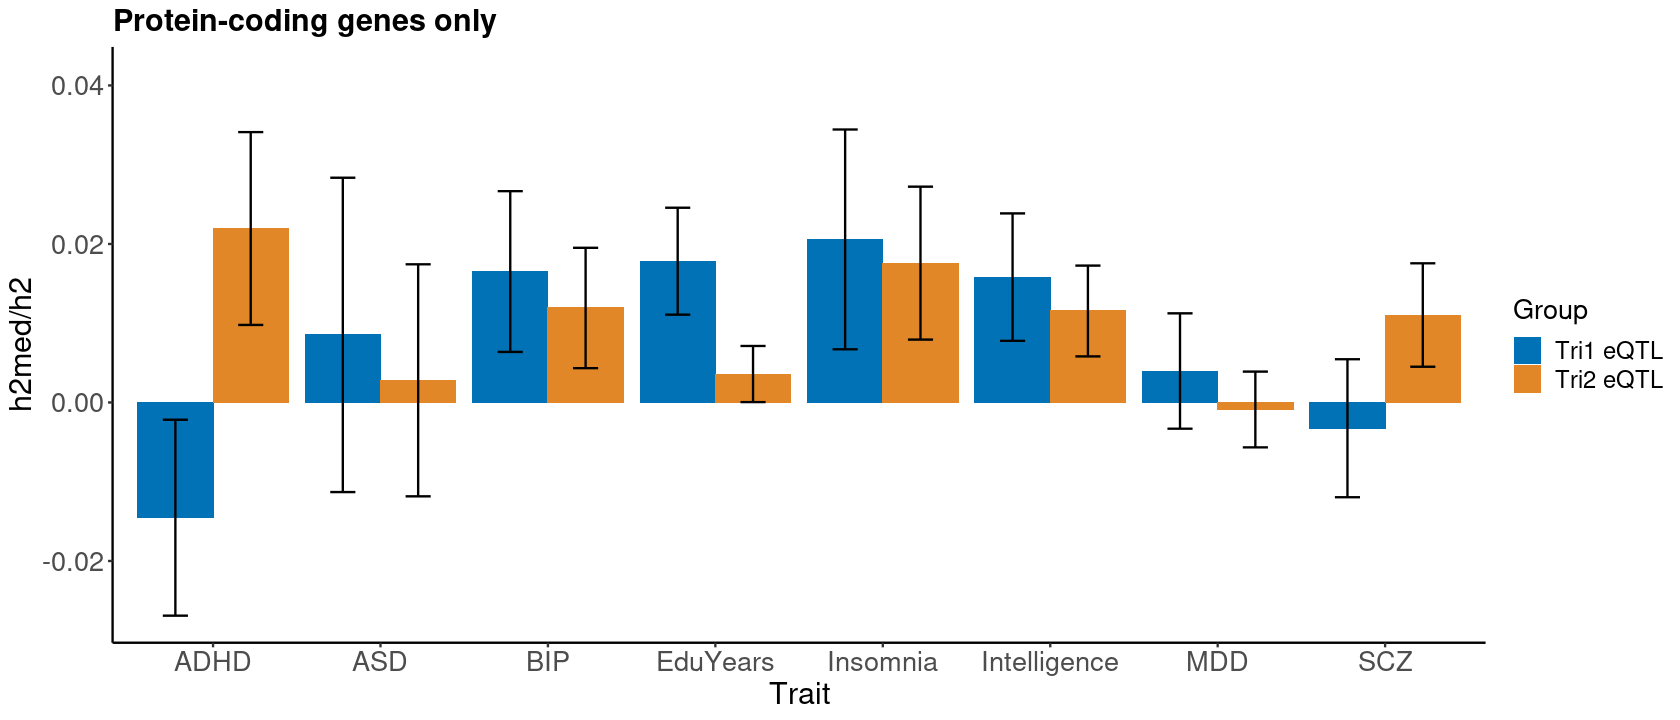

In [21]:
options(repr.plot.height = 6, repr.plot.width = 14)

ggplot(df, aes(x = Trait, y = Estimate_over_h2, fill = Group,
               ymin = (Estimate_over_h2 - SE.Estimate_over_h2.),
               ymax = (Estimate_over_h2 + SE.Estimate_over_h2.))) +
    geom_bar(position = position_dodge(width = .9), stat = "identity") +
    geom_errorbar(width = 0.3, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
    labs(x = "Trait",
         y = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          plot.title = element_text(size = 18, face = "bold")) +
#     scale_alpha_manual(values = c(0.3, 1)) +
    scale_fill_manual(values = c("Tri1 eQTL" = "#0072B5FF", "Tri2 eQTL" = "#E18727FF")) +
    ggtitle("Protein-coding genes only") +
    geom_text(aes(y = Estimate_over_h2 + SE.Estimate_over_h2. + 0.007, label = sig), 
              color = "black", size = 6, position = position_dodge(width = .9))

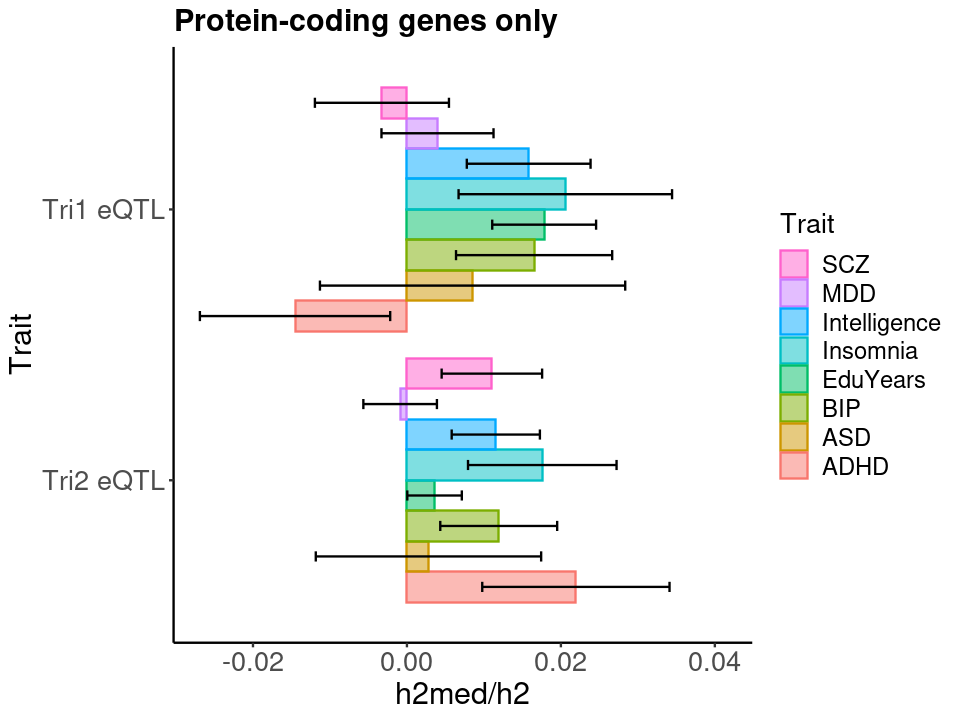

In [62]:
options(repr.plot.height = 6, repr.plot.width = 8)

ggplot(df, aes(x = Estimate_over_h2, y = reorder(Group, desc(Group)), fill = Trait, color = Trait,
               xmin = (Estimate_over_h2 - SE.Estimate_over_h2.),
               xmax = (Estimate_over_h2 + SE.Estimate_over_h2.))) +
    geom_bar(position = position_dodge(width = .9), alpha = 0.5, stat = "identity") +
    geom_errorbar(width = 0.3, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
    labs(y = "Trait",
         x = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          plot.title = element_text(size = 18, face = "bold")) +
#     scale_alpha_manual(values = c(0.3, 1)) +
#     scale_fill_manual(values = c("Tri1 eQTL" = "#0072B5FF", "Tri2 eQTL" = "#E18727FF")) +
    ggtitle("Protein-coding genes only") +
    geom_text(aes(x = Estimate_over_h2 + SE.Estimate_over_h2. + 0.007, label = sig), 
              color = "black", size = 6, position = position_dodge(width = .9)) +
    guides(color = guide_legend(reverse = TRUE),
           fill = guide_legend(reverse = TRUE))

In [63]:
ggsave("../figures/tri_eqtl_protein.pdf", height = 6, width = 8)

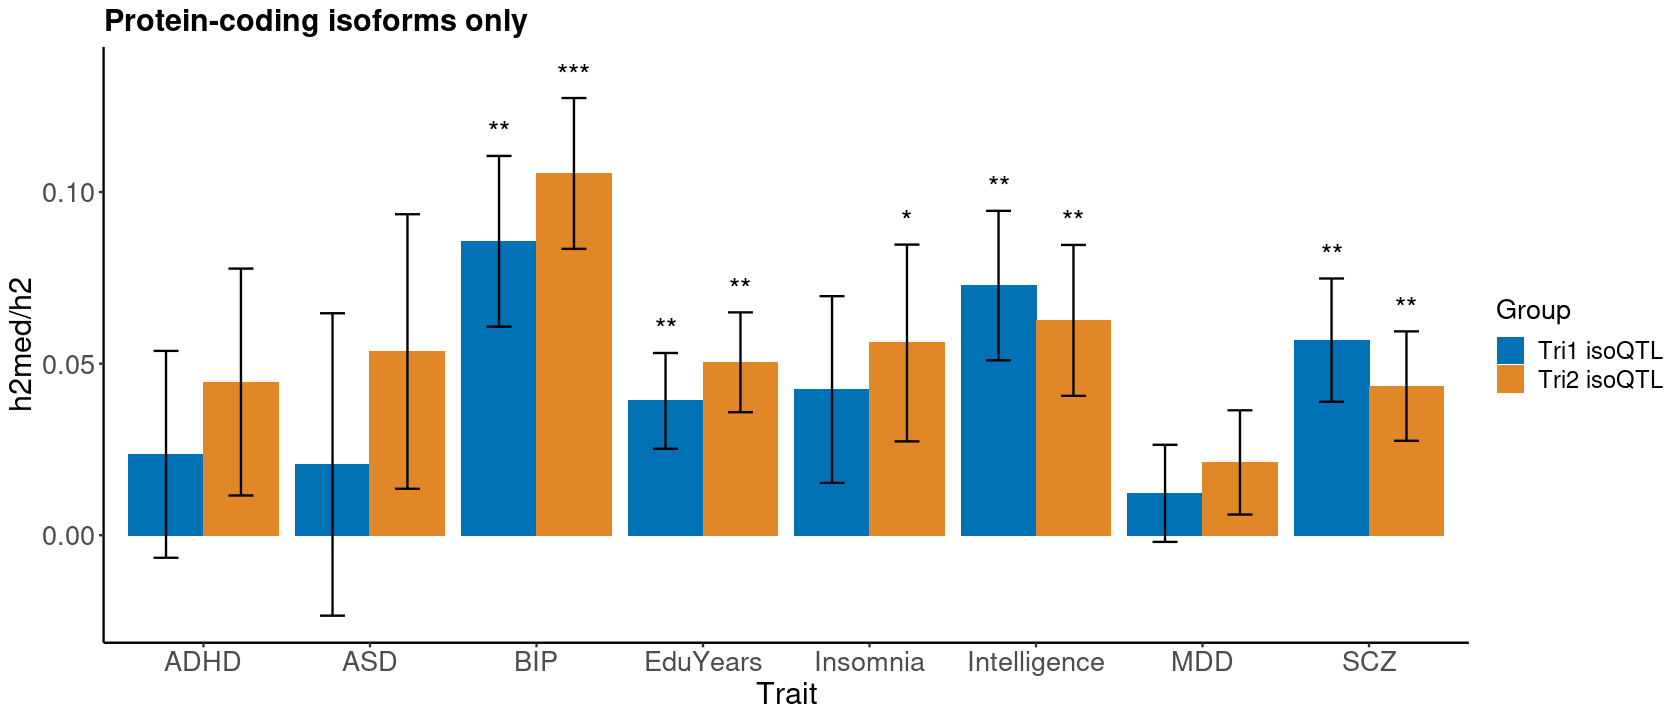

In [64]:
df <- rbind(tri1.iso.df, tri2.iso.df)
df <- df %>% filter(Trait != "ALZ.Jansen.2019")
df[df$Trait == "ADHD.Demontis.2019", 'Trait'] <- 'ADHD'
# df[df$Trait == "ALZ.Jansen.2019", 'Trait'] <- 'ALZ'
df[df$Trait == "ASD.iPSYCHPGC.2018", 'Trait'] <- 'ASD'
df[df$Trait == "EduYears.SSGAC.Lee2018", 'Trait'] <- 'EduYears'
df[df$Trait == "Insomnia.Jansen.2018", 'Trait'] <- 'Insomnia'
df[df$Trait == "Intelligence.SavageNatGen.2018", 'Trait'] <- 'Intelligence'
df[df$Trait == "MDD.Howard.PGC.2019", 'Trait'] <- 'MDD'
df[df$Trait == "pgc-bip2021-all", 'Trait'] <- 'BIP'
df[df$Trait == "PGC3_SCZ_wave3.european.autosome.public.v3", 'Trait'] <- 'SCZ'

df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)

df$FDR <- p.adjust(df$PVAL.est_over_h2, method = 'fdr')

df$sig <- NA
for (i in 1:nrow(df)) {
    if(df[i,'FDR'] > 0.05) {
        df[i,'sig'] <- ''
    }
    if(df[i,'FDR'] < 0.05 & df[i,'FDR'] > 0.01) {
        df[i,'sig'] <- '*'
    }
    if(df[i,'FDR'] < 0.01 & df[i,'FDR'] > 0.001) {
        df[i,'sig'] <- '**'
    }
    if(df[i,'FDR'] < 0.001) {
        df[i,'sig'] <- '***'
    }
}

options(repr.plot.height = 6, repr.plot.width = 14)

ggplot(df, aes(x = Trait, y = Estimate_over_h2, fill = Group,
               ymin = (Estimate_over_h2 - SE.Estimate_over_h2.),
               ymax = (Estimate_over_h2 + SE.Estimate_over_h2.))) +
    geom_bar(position = position_dodge(width = .9), stat = "identity") +
    geom_errorbar(width = 0.3, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
    labs(x = "Trait",
         y = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          plot.title = element_text(size = 18, face = "bold")) +
#     scale_alpha_manual(values = c(0.3, 1)) +
    scale_fill_manual(values = c("Tri1 isoQTL" = "#0072B5FF", "Tri2 isoQTL" = "#E18727FF")) +
    ggtitle("Protein-coding isoforms only") +
    geom_text(aes(y = Estimate_over_h2 + SE.Estimate_over_h2. + 0.007, label = sig), 
              color = "black", size = 6, position = position_dodge(width = .9))

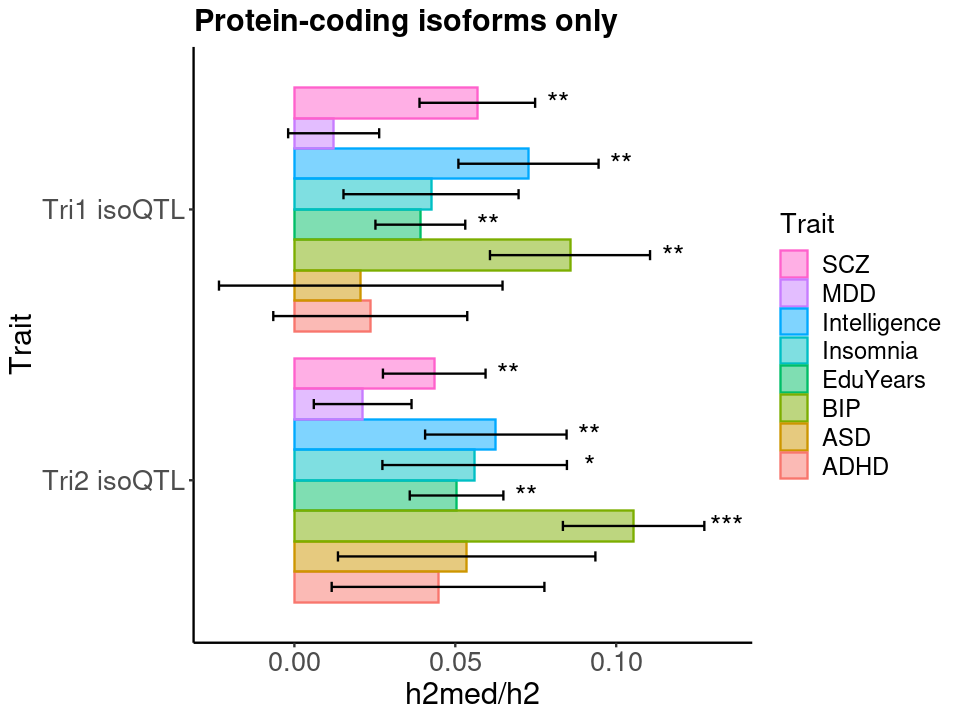

In [65]:
options(repr.plot.height = 6, repr.plot.width = 8)

ggplot(df, aes(x = Estimate_over_h2, y = reorder(Group, desc(Group)), fill = Trait, color = Trait,
               xmin = (Estimate_over_h2 - SE.Estimate_over_h2.),
               xmax = (Estimate_over_h2 + SE.Estimate_over_h2.))) +
    geom_bar(position = position_dodge(width = .9), alpha = 0.5, stat = "identity") +
    geom_errorbar(width = 0.3, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
    labs(y = "Trait",
         x = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          plot.title = element_text(size = 18, face = "bold")) +
#     scale_alpha_manual(values = c(0.3, 1)) +
#     scale_fill_manual(values = c("Tri1 eQTL" = "#0072B5FF", "Tri2 eQTL" = "#E18727FF")) +
    ggtitle("Protein-coding isoforms only") +
    geom_text(aes(x = Estimate_over_h2 + SE.Estimate_over_h2. + 0.007, label = sig), 
              color = "black", size = 6, position = position_dodge(width = .9)) +
    guides(color = guide_legend(reverse = TRUE),
           fill = guide_legend(reverse = TRUE))

In [66]:
ggsave("../figures/tri_isoqtl_protein.pdf", height = 6, width = 8)

**4/23/2023 update, for revision: trimester protein-coding gene sets**

In [2]:
setwd("/u/project/gandalm/cindywen/isoform_twas/MESC/out/")

In [21]:
tri1.gene.results <- list.files(path = ".", pattern = "^tri1_25HCP.all.gene.*.all.h2med")
tri2.gene.results <- list.files(path = ".", pattern = "^tri2_15HCP.all.gene.*.all.h2med")

In [22]:
tri1.geneset.results <- list.files(path = ".", pattern = "^tri1_25HCP.geneset.*.all.h2med")
tri2.geneset.results <- list.files(path = ".", pattern = "^tri2_15HCP.geneset.*.all.h2med")

In [23]:
for (i in 1:length(tri1.gene.results)) {
    file_name <- sub('tri1_25HCP.all.gene.', '', tri1.gene.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri1.gene.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri1.gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri1.gene.df <- tri1.gene.df %>% filter(Quantity == "h2med")
tri1.gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri1.gene.df$Group <- "Tri1 genes"

In [24]:
for (i in 1:length(tri2.gene.results)) {
    file_name <- sub('tri2_15HCP.all.gene.', '', tri2.gene.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri2.gene.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri2.gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri2.gene.df <- tri2.gene.df %>% filter(Quantity == "h2med")
tri2.gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri2.gene.df$Group <- "Tri2 genes"

In [25]:
for (i in 1:length(tri1.geneset.results)) {
    file_name <- sub('tri1_25HCP.geneset.', '', tri1.geneset.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri1.geneset.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri1.geneset.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri1.geneset.df <- tri1.geneset.df %>% filter(Quantity == "h2med")
tri1.geneset.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri1.geneset.df$Group <- "Tri1 geneset"

for (i in 1:length(tri2.geneset.results)) {
    file_name <- sub('tri2_15HCP.geneset.', '', tri2.geneset.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri2.geneset.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri2.geneset.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri2.geneset.df <- tri2.geneset.df %>% filter(Quantity == "h2med")
tri2.geneset.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri2.geneset.df$Group <- "Tri2 geneset"

In [26]:
# check consistent results between original and geneset analysis -> ok
cor(tri1.gene.df$Estimate_over_h2, tri1.geneset.df$Estimate_over_h2)
cor(tri2.gene.df$Estimate_over_h2, tri2.geneset.df$Estimate_over_h2)

[1] 0.9885823

[1] 0.9933794

In [32]:
df <- rbind(tri1.geneset.df, tri2.geneset.df)
df <- df %>% filter(Trait != "ALZ.Jansen.2019")
df[df$Trait == "ADHD.Demontis.2019", 'Trait'] <- 'ADHD'
# df[df$Trait == "ALZ.Jansen.2019", 'Trait'] <- 'ALZ'
df[df$Trait == "ASD.iPSYCHPGC.2018", 'Trait'] <- 'ASD'
df[df$Trait == "EduYears.SSGAC.Lee2018", 'Trait'] <- 'EduYears'
df[df$Trait == "Insomnia.Jansen.2018", 'Trait'] <- 'Insomnia'
df[df$Trait == "Intelligence.SavageNatGen.2018", 'Trait'] <- 'Intelligence'
df[df$Trait == "MDD.Howard.PGC.2019", 'Trait'] <- 'MDD'
df[df$Trait == "pgc-bip2021-all", 'Trait'] <- 'BIP'
df[df$Trait == "PGC3_SCZ_wave3.european.autosome.public.v3", 'Trait'] <- 'SCZ'

In [33]:
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)

df$FDR <- p.adjust(df$PVAL.est_over_h2, method = 'fdr')

df$sig <- NA
for (i in 1:nrow(df)) {
    if(df[i,'FDR'] > 0.05) {
        df[i,'sig'] <- ''
    }
    if(df[i,'FDR'] < 0.05 & df[i,'FDR'] > 0.01) {
        df[i,'sig'] <- '*'
    }
    if(df[i,'FDR'] < 0.01 & df[i,'FDR'] > 0.001) {
        df[i,'sig'] <- '**'
    }
    if(df[i,'FDR'] < 0.001) {
        df[i,'sig'] <- '***'
    }
}

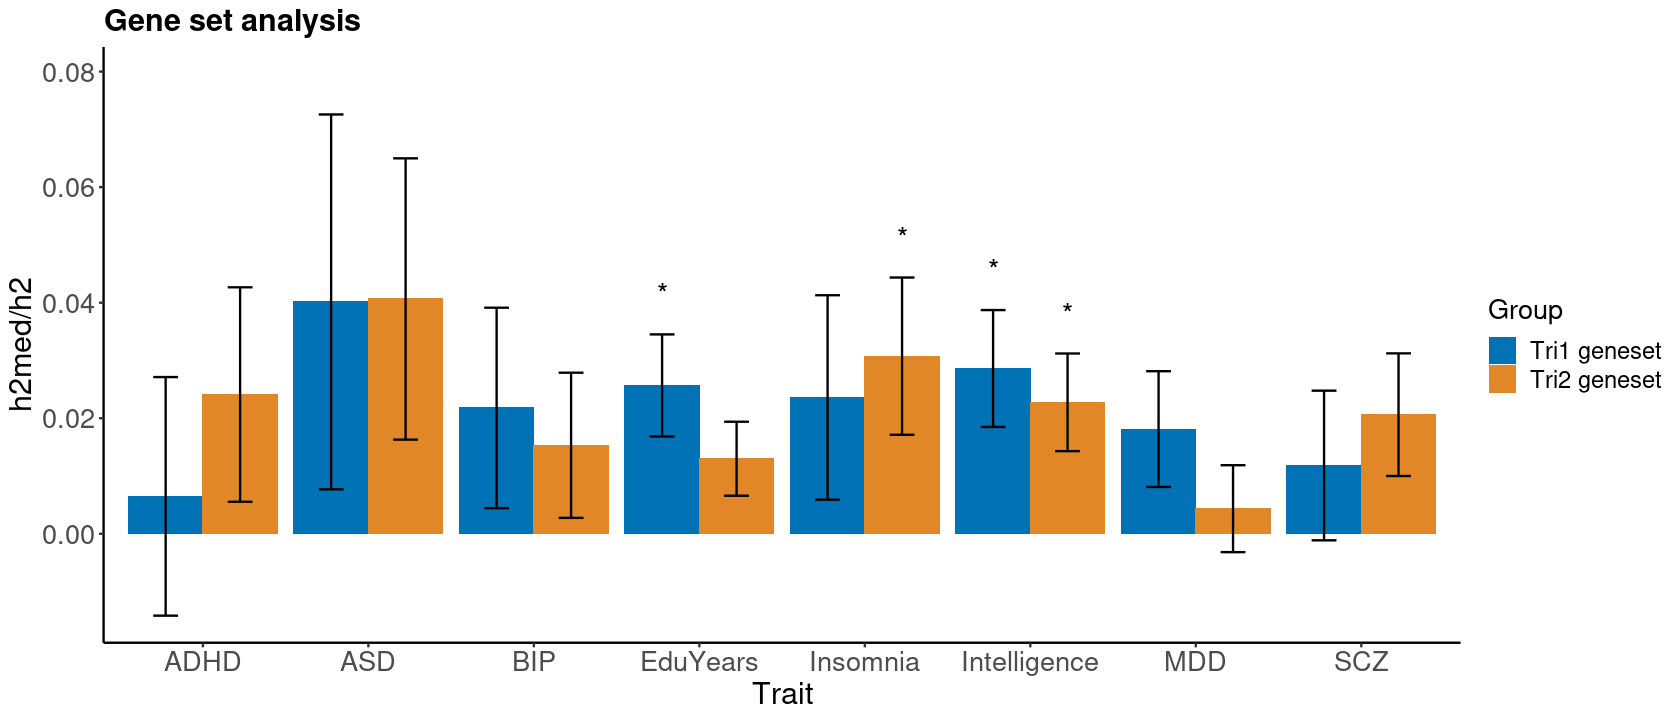

In [36]:
ggplot(df, aes(x = Trait, y = Estimate_over_h2, fill = Group,
               ymin = (Estimate_over_h2 - SE.Estimate_over_h2.),
               ymax = (Estimate_over_h2 + SE.Estimate_over_h2.))) +
    geom_bar(position = position_dodge(width = .9), stat = "identity") +
    geom_errorbar(width = 0.3, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
    labs(x = "Trait",
         y = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          plot.title = element_text(size = 18, face = "bold")) +
    scale_alpha_manual(values = c(0.3, 1)) +
    scale_fill_manual(values = c("#0072B5FF", "#E18727FF")) +
    ggtitle("Gene set analysis") +
    geom_text(aes(y = Estimate_over_h2 + SE.Estimate_over_h2. + 0.007, label = sig), 
              color = "black", size = 6, position = position_dodge(width = .9))

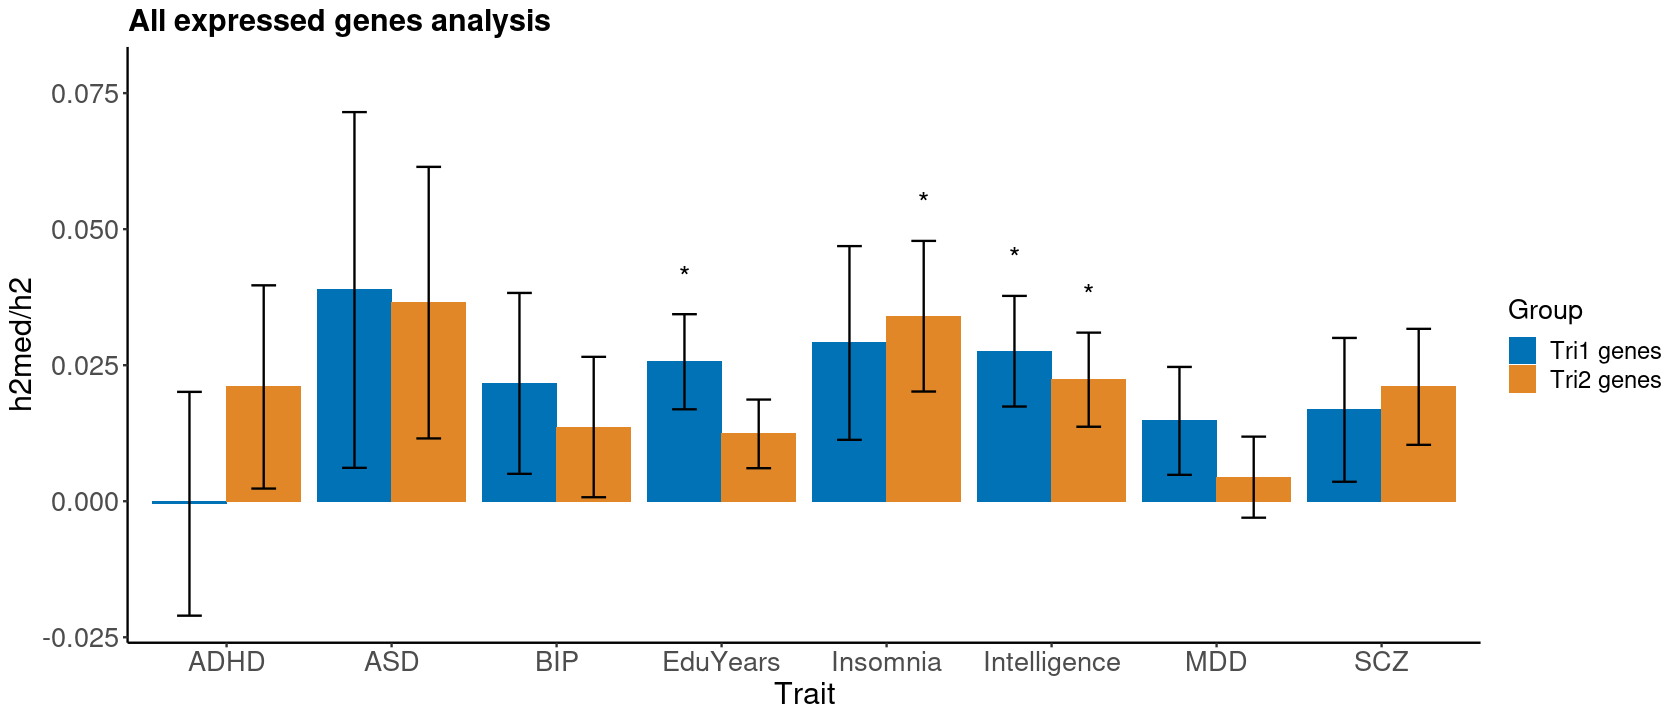

In [38]:
df <- rbind(tri1.gene.df, tri2.gene.df)
df <- df %>% filter(Trait != "ALZ.Jansen.2019")
df[df$Trait == "ADHD.Demontis.2019", 'Trait'] <- 'ADHD'
# df[df$Trait == "ALZ.Jansen.2019", 'Trait'] <- 'ALZ'
df[df$Trait == "ASD.iPSYCHPGC.2018", 'Trait'] <- 'ASD'
df[df$Trait == "EduYears.SSGAC.Lee2018", 'Trait'] <- 'EduYears'
df[df$Trait == "Insomnia.Jansen.2018", 'Trait'] <- 'Insomnia'
df[df$Trait == "Intelligence.SavageNatGen.2018", 'Trait'] <- 'Intelligence'
df[df$Trait == "MDD.Howard.PGC.2019", 'Trait'] <- 'MDD'
df[df$Trait == "pgc-bip2021-all", 'Trait'] <- 'BIP'
df[df$Trait == "PGC3_SCZ_wave3.european.autosome.public.v3", 'Trait'] <- 'SCZ'

df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)

df$FDR <- p.adjust(df$PVAL.est_over_h2, method = 'fdr')

df$sig <- NA
for (i in 1:nrow(df)) {
    if(df[i,'FDR'] > 0.05) {
        df[i,'sig'] <- ''
    }
    if(df[i,'FDR'] < 0.05 & df[i,'FDR'] > 0.01) {
        df[i,'sig'] <- '*'
    }
    if(df[i,'FDR'] < 0.01 & df[i,'FDR'] > 0.001) {
        df[i,'sig'] <- '**'
    }
    if(df[i,'FDR'] < 0.001) {
        df[i,'sig'] <- '***'
    }
}


ggplot(df, aes(x = Trait, y = Estimate_over_h2, fill = Group,
               ymin = (Estimate_over_h2 - SE.Estimate_over_h2.),
               ymax = (Estimate_over_h2 + SE.Estimate_over_h2.))) +
    geom_bar(position = position_dodge(width = .9), stat = "identity") +
    geom_errorbar(width = 0.3, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
    labs(x = "Trait",
         y = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          plot.title = element_text(size = 18, face = "bold")) +
    scale_alpha_manual(values = c(0.3, 1)) +
    scale_fill_manual(values = c("#0072B5FF", "#E18727FF"))  +
    ggtitle("All expressed genes analysis") +
    geom_text(aes(y = Estimate_over_h2 + SE.Estimate_over_h2. + 0.007, label = sig), 
              color = "black", size = 6, position = position_dodge(width = .9))


In [39]:
# now read gene category results
tri1.geneset.cat.results <- list.files(path = ".", pattern = "^tri1_25HCP.geneset.*.categories.h2med")
tri2.geneset.cat.results <- list.files(path = ".", pattern = "^tri2_15HCP.geneset.*.categories.h2med")

In [40]:
for (i in 1:length(tri1.geneset.cat.results)) {
    file_name <- sub('tri1_25HCP.geneset.', '', tri1.geneset.cat.results[i])
    file_name <- sub('.categories.h2med', '', file_name)
    file_df <- read.table(tri1.geneset.cat.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri1.geneset.cat.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)

tri1.geneset.cat.df <- tri1.geneset.cat.df %>% filter(Gene_category %in% c("NON_PROTEIN_CODING", "PROTEIN_CODING"))
tri1.geneset.cat.df$Trait <- rep(c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3"), each = 2)

tri1.geneset.cat.df$Group <- "Tri1 geneset"


In [41]:
for (i in 1:length(tri2.geneset.cat.results)) {
    file_name <- sub('tri2_15HCP.geneset.', '', tri2.geneset.cat.results[i])
    file_name <- sub('.categories.h2med', '', file_name)
    file_df <- read.table(tri2.geneset.cat.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri2.geneset.cat.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)

tri2.geneset.cat.df <- tri2.geneset.cat.df %>% filter(Gene_category %in% c("NON_PROTEIN_CODING", "PROTEIN_CODING"))
tri2.geneset.cat.df$Trait <- rep(c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3"), each = 2)

tri2.geneset.cat.df$Group <- "Tri2 geneset"


In [42]:
df <- rbind(tri1.geneset.cat.df, tri2.geneset.cat.df)

In [43]:
df <- df %>% filter(Trait != "ALZ.Jansen.2019")
df[df$Trait == "ADHD.Demontis.2019", 'Trait'] <- 'ADHD'
# df[df$Trait == "ALZ.Jansen.2019", 'Trait'] <- 'ALZ'
df[df$Trait == "ASD.iPSYCHPGC.2018", 'Trait'] <- 'ASD'
df[df$Trait == "EduYears.SSGAC.Lee2018", 'Trait'] <- 'EduYears'
df[df$Trait == "Insomnia.Jansen.2018", 'Trait'] <- 'Insomnia'
df[df$Trait == "Intelligence.SavageNatGen.2018", 'Trait'] <- 'Intelligence'
df[df$Trait == "MDD.Howard.PGC.2019", 'Trait'] <- 'MDD'
df[df$Trait == "pgc-bip2021-all", 'Trait'] <- 'BIP'
df[df$Trait == "PGC3_SCZ_wave3.european.autosome.public.v3", 'Trait'] <- 'SCZ'

In [44]:
colnames(df)

[1] "Gene_category"             "Num_genes"                
 [3] "Prop_genes"                "Ave_h2cis"                
 [5] "h2med"                     "SE.h2med."                
 [7] "h2med_over_h2med.tot."     "SE.h2med_over_h2med.tot.."
 [9] "h2med_enrichment"          "SE.h2med_enrichment."     
[11] "h2med_enrichment_pvalue"   "Coefficient"              
[13] "SE.Coefficient."           "Trait"                    
[15] "Group"

In [45]:
df$h2med_enrichment_pvalue.fdr <- p.adjust(df$h2med_enrichment_pvalue, method = "fdr")
df$h2med_enrichment_pvalue.bonf <- p.adjust(df$h2med_enrichment_pvalue, method = "bonferroni")

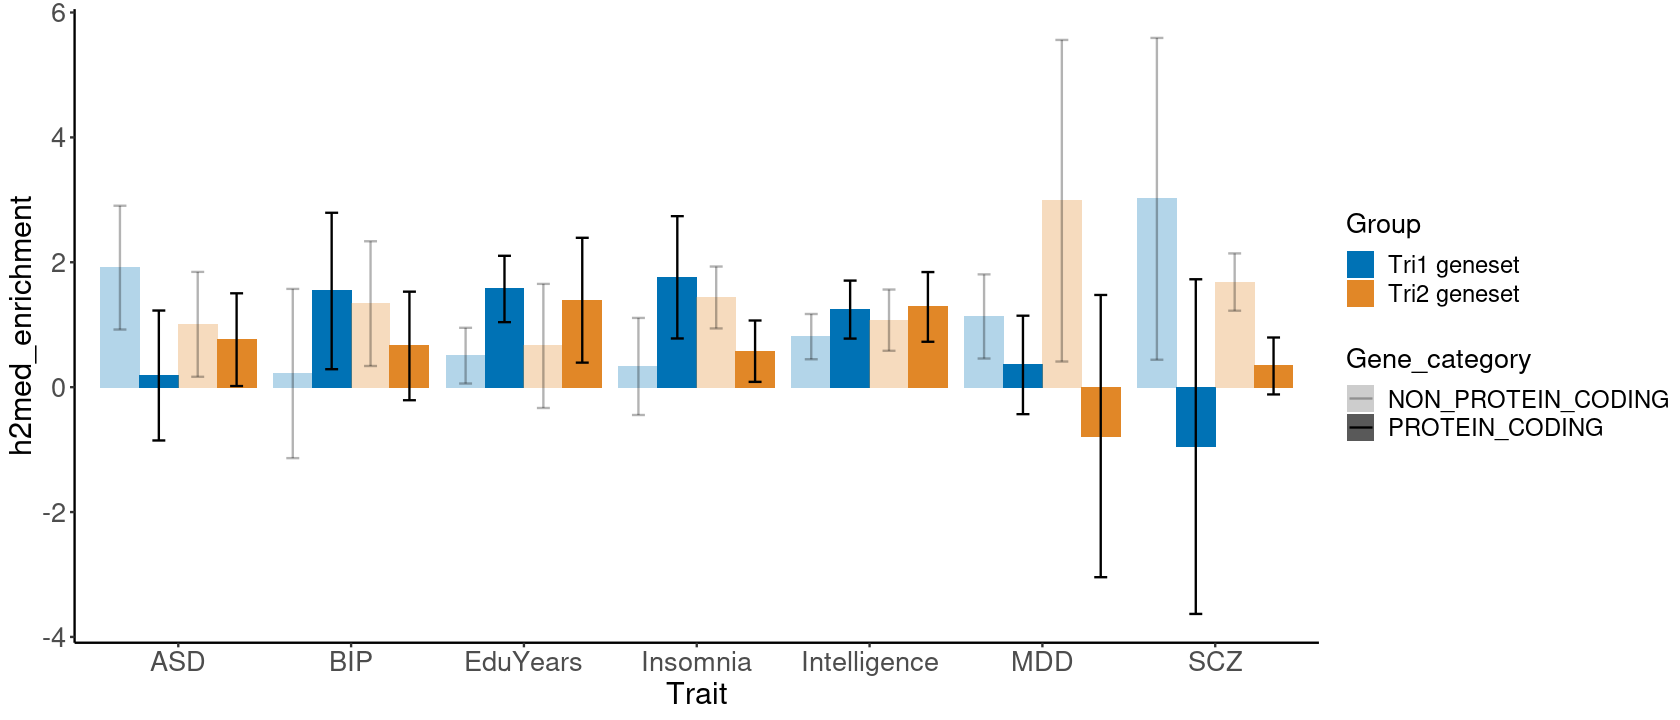

In [54]:
options(repr.plot.height = 6, repr.plot.width = 14)

ggplot(df %>% filter(Trait != "ADHD"), aes(x = Trait, y = h2med_enrichment, fill = Group, alpha = Gene_category,
               ymin = (h2med_enrichment - SE.h2med_enrichment.),
               ymax = (h2med_enrichment + SE.h2med_enrichment.))) +
    geom_bar(position = position_dodge(width = .9), stat = "identity") +
    geom_errorbar(width = 0.3, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
#     labs(y = "Category",
#          x = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_alpha_manual(values = c(0.3, 1)) +
    scale_fill_manual(values = c("#0072B5FF", "#E18727FF"))

In [55]:
ggsave("../figures/tri_geneset.pdf", height = 6, width = 14)

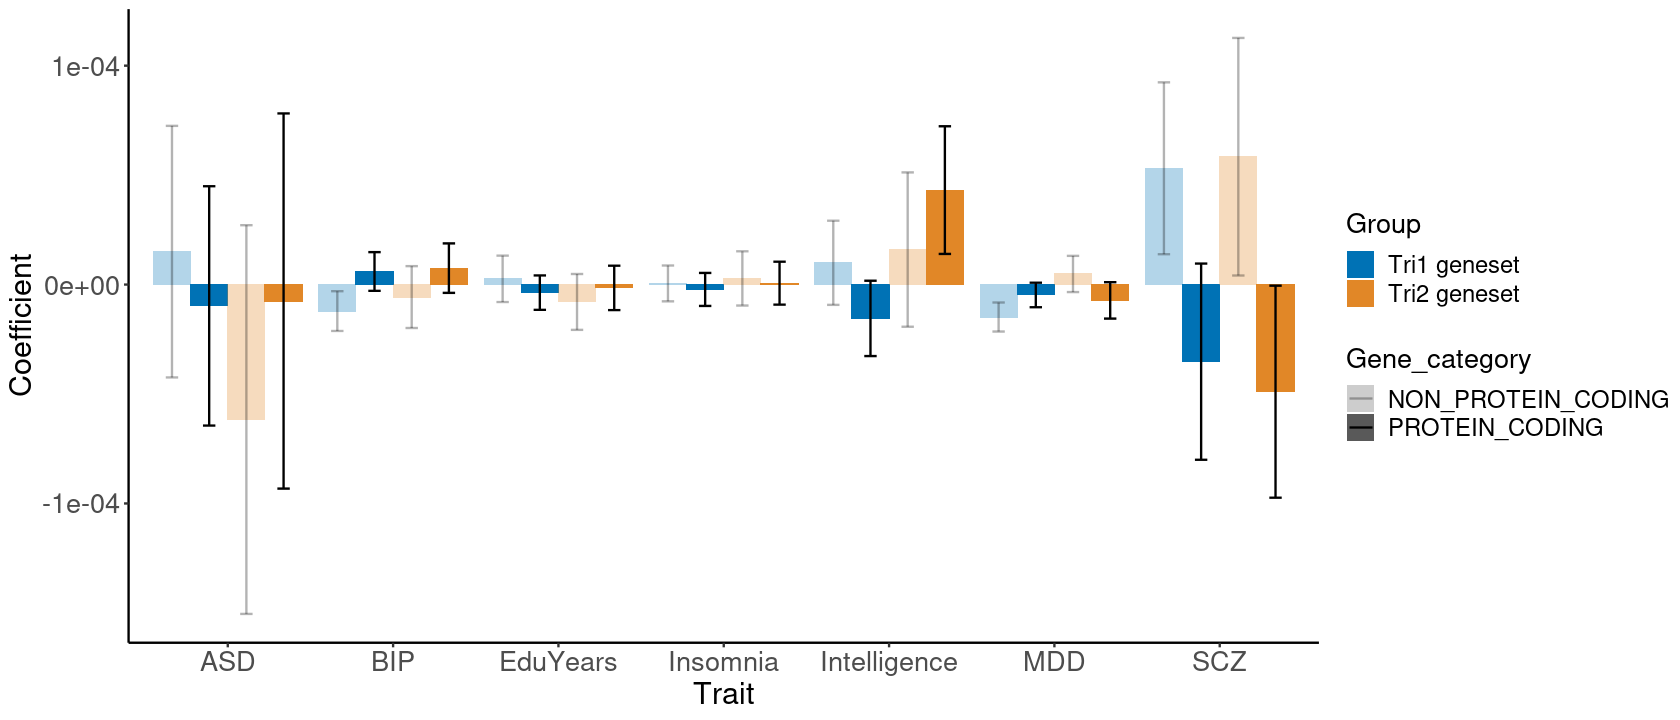

In [56]:
ggplot(df %>% filter(Trait != "ADHD"), aes(x = Trait, y = Coefficient, fill = Group, alpha = Gene_category,
               ymin = (Coefficient - SE.Coefficient.),
               ymax = (Coefficient + SE.Coefficient.))) +
    geom_bar(position = position_dodge(width = .9), stat = "identity") +
    geom_errorbar(width = 0.3, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
#     labs(y = "Category",
#          x = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_alpha_manual(values = c(0.3, 1)) +
    scale_fill_manual(values = c("#0072B5FF", "#E18727FF"))

**For revision: Make gene set file for pLI**
Note not considering isoforms of a gene having different pLI scores

Exac:

2897 genes pLI > 0.9 (33,308 isoforms)

13546 genes pLI < 0.9 (101,665 isoforms)

Expressed genes:

29079 not high pLI (including genes not in Exac)

11450 low pLI

Expressed isoforms:

101,179 not high pLI

68,055 low pLI

In [87]:
exac <- fread("/u/project/gandalm/shared/refGenomes/gnomAD_ExAC/forweb_cleaned_exac_r03_march16_z_data_pLI_CNV-final.txt.gz", data.table = F)

In [88]:
exac <- exac %>% select(gene, pLI)
exac <- exac[!duplicated(exac$gene),]

In [89]:
gencode <- fread("~/project-gandalm/isoform_twas/salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table = F)
gencode <- gencode %>% filter(!V1 %in% c("chrM", "chrX", "chrY")) %>% select(ensg, V11, V12)
dim(gencode)

[1] 59323     3

In [90]:
exac <- exac %>% inner_join(gencode, by = c("gene" = "V12"))

In [86]:
length(unique(exac$gene))
length(unique(exac$ensg))
table(exac$V11)

[1] 16464

[1] 16485


                            lncRNA             polymorphic_pseudogene 
                                62                                 21 
              processed_pseudogene                     protein_coding 
                                 6                              16383 
                               TEC   transcribed_processed_pseudogene 
                                 2                                  2 
    transcribed_unitary_pseudogene transcribed_unprocessed_pseudogene 
                                 1                                  4 
            unprocessed_pseudogene 
                                 4 

In [91]:
exac <- exac[!duplicated(exac$gene),]

In [92]:
upper <- exac %>% filter(pLI > 0.9)
lower <- exac %>% filter(pLI < 0.9)
dim(upper)
dim(lower)

[1] 2902    4

[1] 13562     4

In [93]:
geneset <- data.frame(V1 = c("pLI_high","pLI_low"), V2 = c(paste(upper$ensg, collapse = " "), paste(lower$ensg, collapse = " ")))

In [81]:
write.table(geneset, "../code/pLI_gene_set.tsv", col.names = F, row.names = F, sep = " ", quote = F)

In [95]:
tx2gene <- read.table("~/project-gandalm/isoform_twas/salmon/tx2gene_gencode_v33_noGeneVersion.tsv", header = T)

In [97]:
tx.high <- tx2gene %>% filter(Gene %in% upper$ensg)
tx.low <- tx2gene %>% filter(Gene %in% lower$ensg)
dim(tx.high)
dim(tx.low)

[1] 33329     2

[1] 101749      2

In [98]:
geneset <- data.frame(V1 = c("pLI_high","pLI_low"), V2 = c(paste(tx.high$Tx, collapse = " "), paste(tx.low$Tx, collapse = " ")))
write.table(geneset, "../code/Tx_pLI_gene_set.tsv", col.names = F, row.names = F, sep = " ", quote = F)

**eQTL, isoQTL pLI gene sets results**

In [3]:
geneset.results <- list.files(path = ".", pattern = "^geneset.*.all.h2med")
iso.geneset.results <- list.files(path = ".", pattern = "^iso.geneset.*.all.h2med")

geneset.cat.results <- list.files(path = ".", pattern = "^geneset.*.categories.h2med")
iso.geneset.cat.results <- list.files(path = ".", pattern = "^iso.geneset.*.categories.h2med")

In [5]:
for (i in 1:length(geneset.cat.results)) {
    file_name <- sub('geneset.', '', geneset.cat.results[i])
    file_name <- sub('.categories.h2med', '', file_name)
    file_df <- read.table(geneset.cat.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

geneset.cat.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)

geneset.cat.df <- geneset.cat.df %>% filter(Gene_category %in% c("pLI_high", "pLI_low"))
geneset.cat.df$Trait <- rep(c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3"), each = 2)

geneset.cat.df$Group <- "eQTL"


In [6]:
for (i in 1:length(iso.geneset.cat.results)) {
    file_name <- sub('iso.geneset.', '', iso.geneset.cat.results[i])
    file_name <- sub('.categories.h2med', '', file_name)
    file_df <- read.table(iso.geneset.cat.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

iso.geneset.cat.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)

iso.geneset.cat.df <- iso.geneset.cat.df %>% filter(Gene_category %in% c("pLI_high", "pLI_low"))
iso.geneset.cat.df$Trait <- rep(c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3"), each = 2)

iso.geneset.cat.df$Group <- "isoQTL"

In [7]:
df <- rbind(geneset.cat.df, iso.geneset.cat.df)

df <- df %>% filter(Trait != "ALZ.Jansen.2019")
df[df$Trait == "ADHD.Demontis.2019", 'Trait'] <- 'ADHD'
# df[df$Trait == "ALZ.Jansen.2019", 'Trait'] <- 'ALZ'
df[df$Trait == "ASD.iPSYCHPGC.2018", 'Trait'] <- 'ASD'
df[df$Trait == "EduYears.SSGAC.Lee2018", 'Trait'] <- 'EduYears'
df[df$Trait == "Insomnia.Jansen.2018", 'Trait'] <- 'Insomnia'
df[df$Trait == "Intelligence.SavageNatGen.2018", 'Trait'] <- 'Intelligence'
df[df$Trait == "MDD.Howard.PGC.2019", 'Trait'] <- 'MDD'
df[df$Trait == "pgc-bip2021-all", 'Trait'] <- 'BIP'
df[df$Trait == "PGC3_SCZ_wave3.european.autosome.public.v3", 'Trait'] <- 'SCZ'

df$h2med_enrichment_pvalue.fdr <- p.adjust(df$h2med_enrichment_pvalue, method = "fdr")
df$h2med_enrichment_pvalue.bonf <- p.adjust(df$h2med_enrichment_pvalue, method = "bonferroni")

In [9]:
df$sig <- NA
for (i in 1:nrow(df)) {
    if(df[i,'h2med_enrichment_pvalue.fdr'] > 0.05) {
        df[i,'sig'] <- ''
    }
    if(df[i,'h2med_enrichment_pvalue.fdr'] < 0.05 & df[i,'h2med_enrichment_pvalue.fdr'] > 0.01) {
        df[i,'sig'] <- '*'
    }
    if(df[i,'h2med_enrichment_pvalue.fdr'] < 0.01 & df[i,'h2med_enrichment_pvalue.fdr'] > 0.001) {
        df[i,'sig'] <- '**'
    }
    if(df[i,'h2med_enrichment_pvalue.fdr'] < 0.001) {
        df[i,'sig'] <- '***'
    }
}

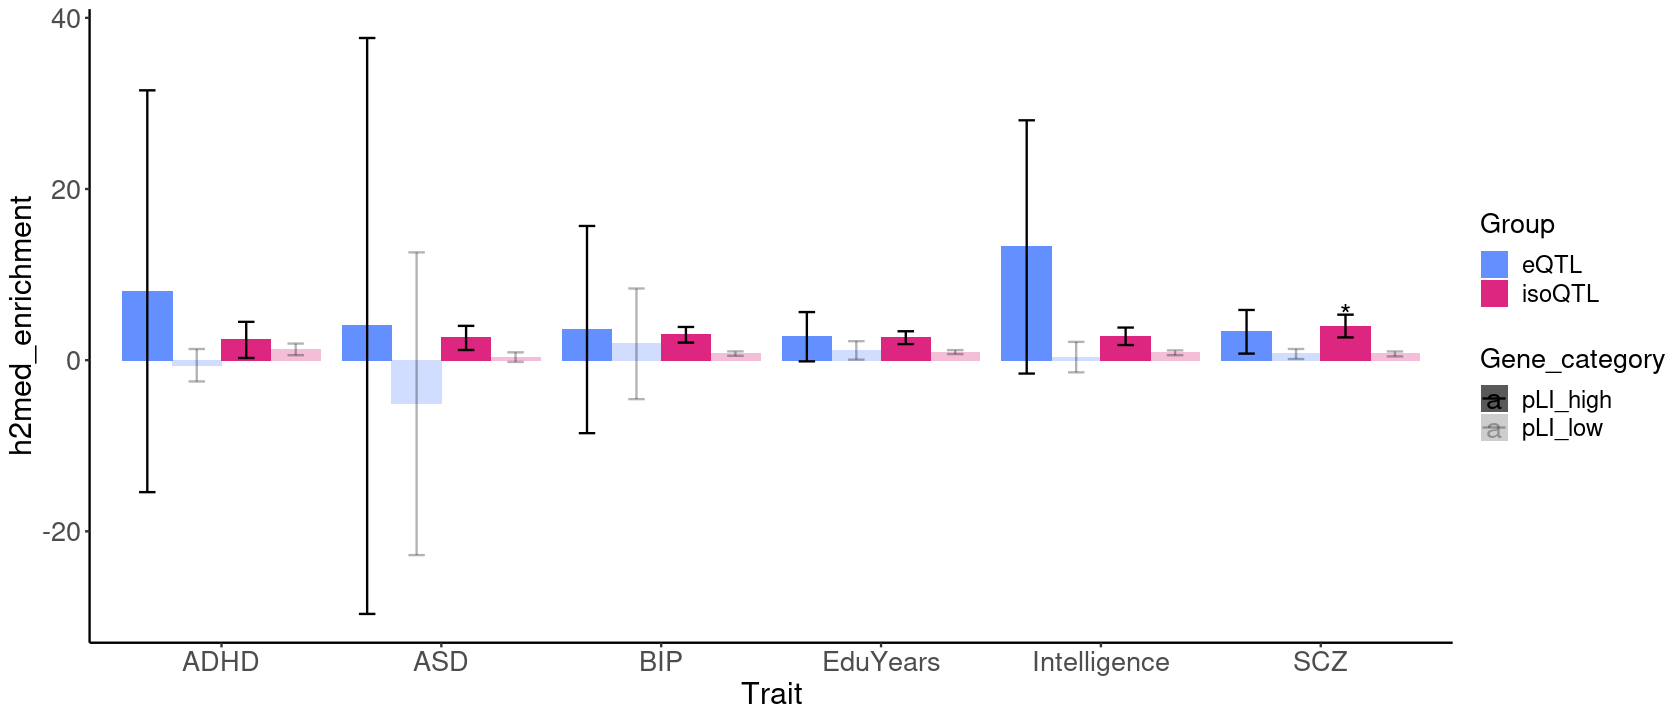

In [15]:
options(repr.plot.height = 6, repr.plot.width = 14)

ggplot(df %>% filter(!Trait %in% c("Insomnia", "MDD")),
               aes(x = Trait, y = h2med_enrichment, fill = Group, alpha = Gene_category,
               ymin = (h2med_enrichment - SE.h2med_enrichment.),
               ymax = (h2med_enrichment + SE.h2med_enrichment.))) +
    geom_bar(position = position_dodge(width = .9), stat = "identity") +
    geom_errorbar(width = 0.3, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
#     labs(y = "Category",
#          x = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_alpha_manual(values = c(1, 0.3)) +
    scale_fill_manual(values = c("#648FFF", "#DC267F")) +
    geom_text(aes(y = h2med_enrichment + SE.h2med_enrichment. + 0.007, label = sig), 
              color = "black", size = 6, position = position_dodge(width = .9))

In [17]:
df$Coefficient.ZSCORE <- df$Coefficient / df$SE.Coefficient.
df$PVAL.Coefficient <- pnorm(df$Coefficient.ZSCORE, lower.tail = FALSE)
df$FDR.Coefficient <- p.adjust(df$PVAL.Coefficient, method = 'fdr')

In [19]:
df$sig.Coef <- NA
for (i in 1:nrow(df)) {
    if(df[i,'FDR.Coefficient'] > 0.05) {
        df[i,'sig.Coef'] <- ''
    }
    if(df[i,'FDR.Coefficient'] < 0.05 & df[i,'FDR.Coefficient'] > 0.01) {
        df[i,'sig.Coef'] <- '*'
    }
    if(df[i,'FDR.Coefficient'] < 0.01 & df[i,'FDR.Coefficient'] > 0.001) {
        df[i,'sig.Coef'] <- '**'
    }
    if(df[i,'FDR.Coefficient'] < 0.001) {
        df[i,'sig.Coef'] <- '***'
    }
}
table(df$sig.Coef)


   
32 

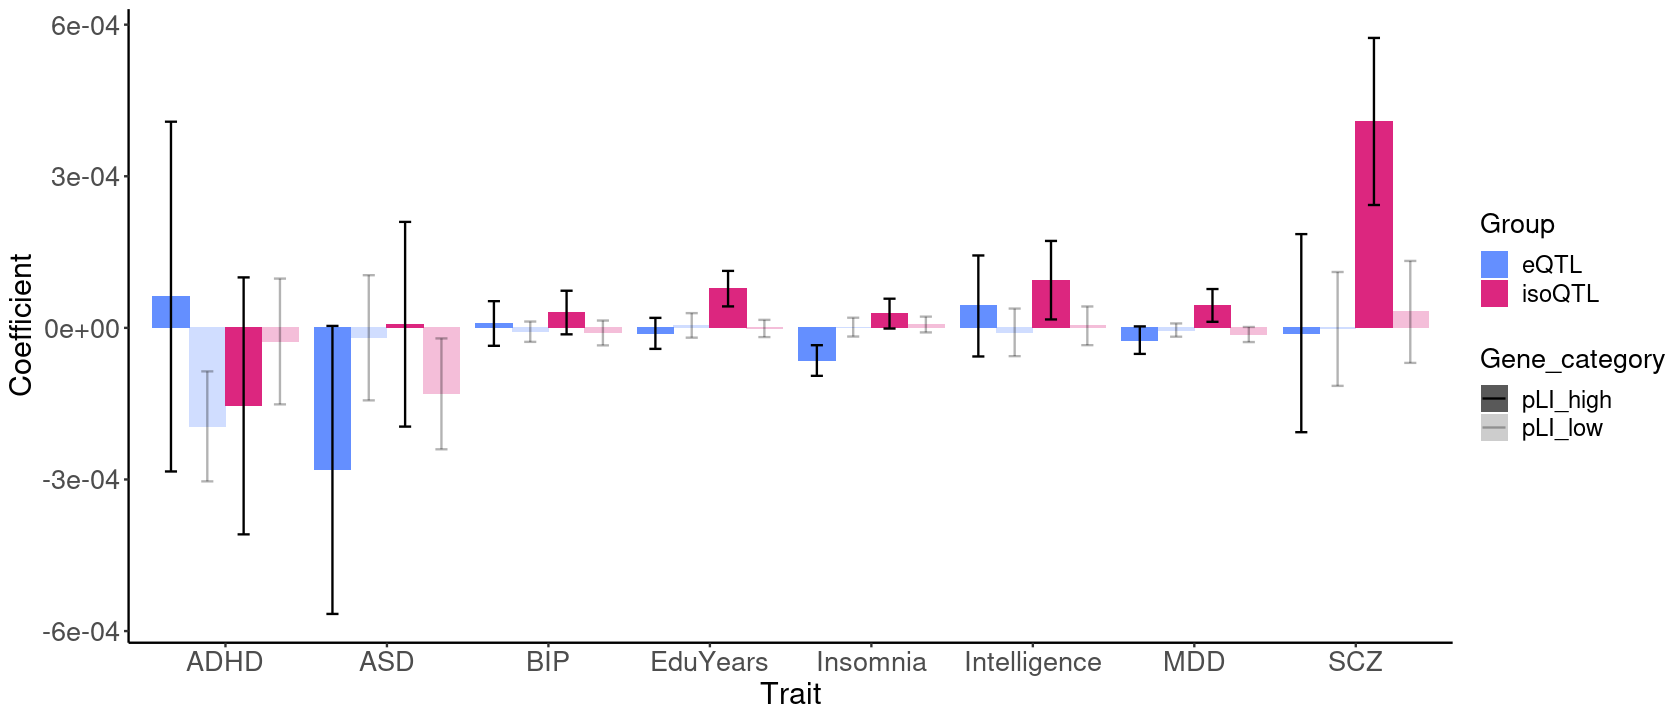

In [16]:
ggplot(df,
               aes(x = Trait, y = Coefficient, fill = Group, alpha = Gene_category,
               ymin = (Coefficient - SE.Coefficient.),
               ymax = (Coefficient + SE.Coefficient.))) +
    geom_bar(position = position_dodge(width = .9), stat = "identity") +
    geom_errorbar(width = 0.3, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
#     labs(y = "Category",
#          x = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_alpha_manual(values = c(1, 0.3)) +
    scale_fill_manual(values = c("#648FFF", "#DC267F"))
